# Requirments


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb
import pandas as pd
import numpy as np

# DATA NORMOLISING

In [5]:
# Load the data
df = pd.read_csv("../Data/AVONET_BIRDLIFE.csv", encoding='ISO-8859-1')

# Clean and remove rows with missing key values
df = df[['species', 'Wing.Length', 'Hand-Wing.Index', 'Tail.Length', 'Mass']].dropna()

# Feature Engineering
df['Wingspan'] = df['Wing.Length'] * 2  # approx. estimate
df['Aspect_Ratio'] = df['Hand-Wing.Index']  # use directly or normalize
df['Wing_Area'] = df['Wingspan'] ** 2 / df['Aspect_Ratio']
df['Wing_Loading'] = df['Mass'] / df['Wing_Area']

# Normalize features for RL environment
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalized = scaler.fit_transform(df[['Wingspan', 'Aspect_Ratio', 'Tail.Length', 'Wing_Loading']])
normalized_df = pd.DataFrame(normalized, columns=['Wingspan', 'Aspect_Ratio', 'Tail_Length', 'Wing_Loading'])

# Final dataset ready for simulation input
print(normalized_df.head(100))


    Wingspan  Aspect_Ratio  Tail_Length  Wing_Loading
0   0.297670      0.455526     0.207826      0.000006
1   0.236262      0.442049     0.172881      0.000005
2   0.290580      0.330189     0.229113      0.000006
3   0.255888      0.425876     0.173127      0.000005
4   0.275386      0.540431     0.188754      0.000007
..       ...           ...          ...           ...
95  0.437706      0.509434     0.226283      0.000008
96  0.454419      0.443396     0.272425      0.000013
97  0.400228      0.334232     0.181002      0.000007
98  0.449607      0.412399     0.253599      0.000010
99  0.674728      0.443396     0.322505      0.000015

[100 rows x 4 columns]


# Version 2 including hand wing index

=== Bird Wing Morphology to Airfoil Shape Generator ===
Using AVONET measurements: Wing.Length, Secondary1, Kipps.Distance

Successfully loaded AVONET data with 11009 species
Using 11009 birds with complete morphological data

Sample species in dataset:
                   species  Wing.Length  Secondary1  Kipps.Distance  \
0    Accipiter_albogularis        235.2       159.5            81.8   
1         Accipiter_badius        186.7       127.4            62.5   
2        Accipiter_bicolor        229.6       174.8            56.6   
3     Accipiter_brachyurus        202.2       138.1            64.1   
4       Accipiter_brevipes        217.6       129.9            87.8   
5        Accipiter_butleri        166.0       123.1            42.9   
6    Accipiter_castanilius        163.5       123.1            38.9   
7  Accipiter_cirrocephalus        213.0       133.7            81.3   
8       Accipiter_collaris        165.9       115.2            49.5   
9       Accipiter_cooperii        24

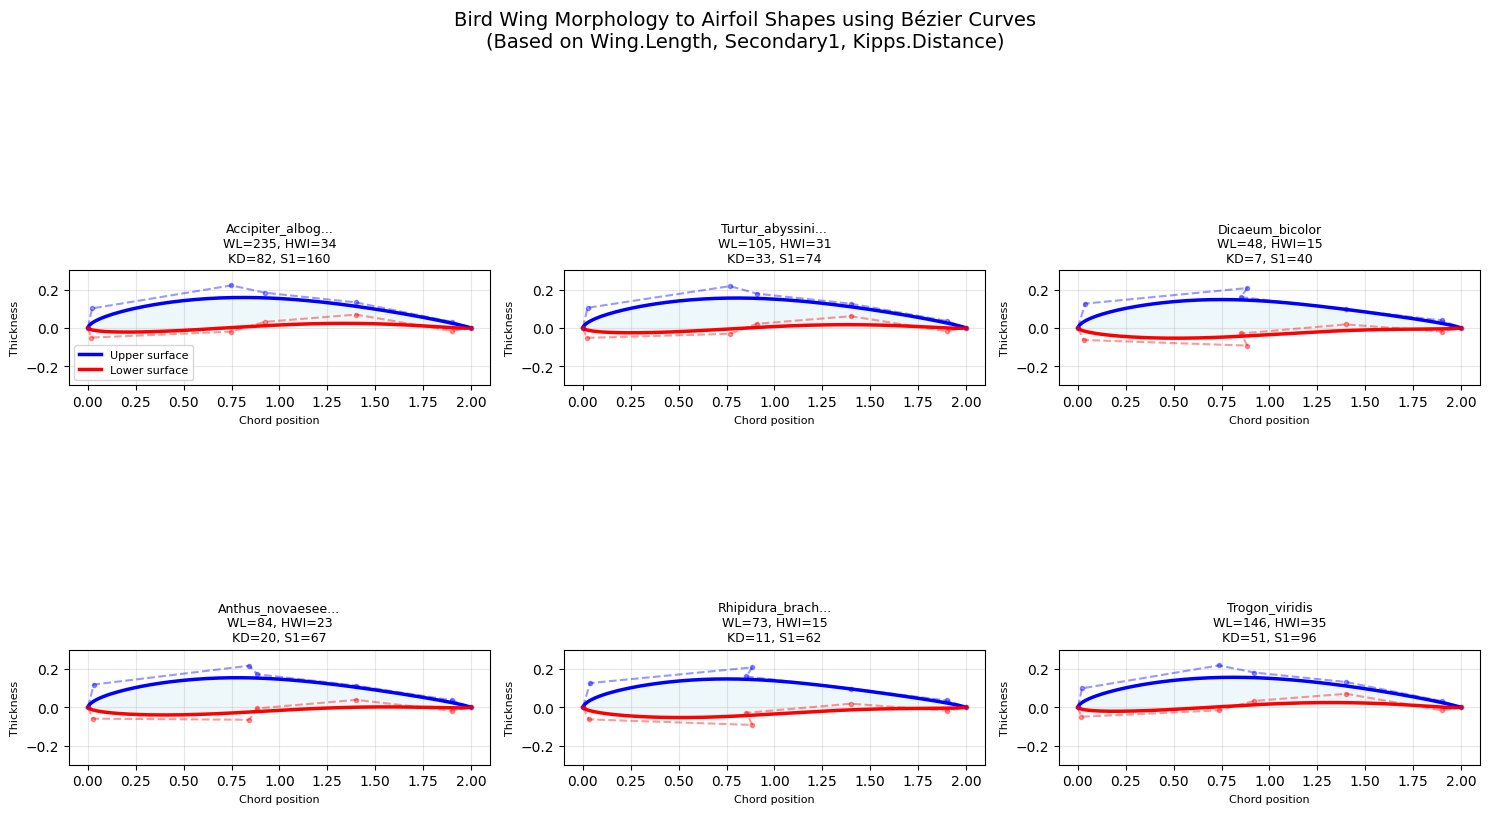


=== Analyzing Wing Morphometry Effects ===


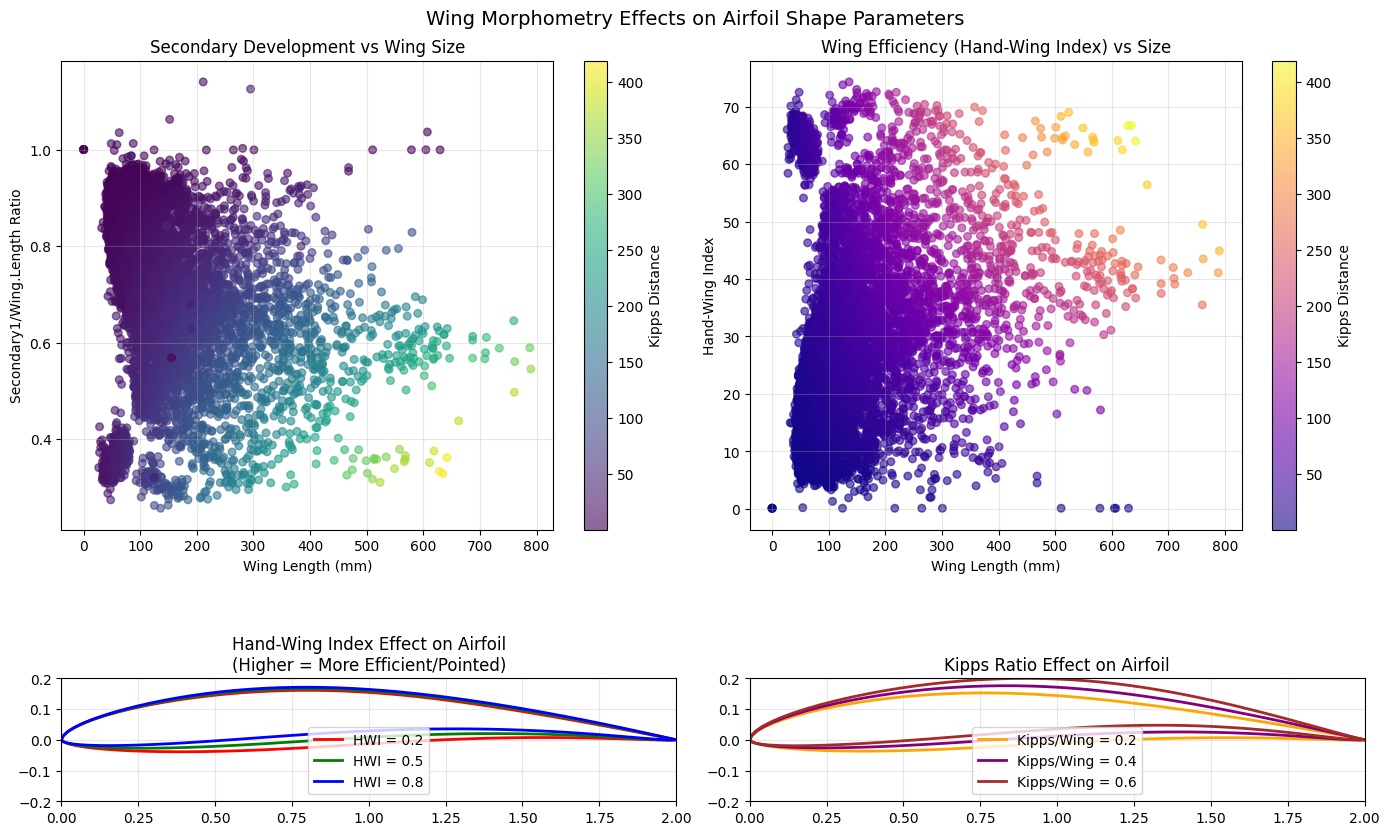


Exporting 3 representative airfoil coordinate files...
Saved: airfoil_Accipiter_albogularis_WL235.dat
Saved: airfoil_Accipiter_badius_WL187.dat
Saved: airfoil_Accipiter_bicolor_WL230.dat

=== Analysis Complete ===
Ready for integration with your RL framework!


In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

class BirdAirfoilGenerator:
    def __init__(self):
        self.fig, self.axes = plt.subplots(2, 3, figsize=(15, 10))
        self.fig.suptitle('Bird Wing Morphology to Airfoil Shapes using Bézier Curves\n(Based on Wing.Length, Secondary1, Kipps.Distance)', fontsize=14)
        
    def load_and_process_data(self, csv_path="../Data/AVONET_BIRDLIFE.csv"):
        """Load and process AVONET bird data using exact column names"""
        try:
            df = pd.read_csv(csv_path, encoding='ISO-8859-1')
            print(f"Successfully loaded AVONET data with {len(df)} species")
        except Exception as e:
            print(f"Could not load CSV file: {e}")
            print("Creating sample data based on AVONET structure...")
            df = self.create_sample_avonet_data()
        
        # Use exact column names from your dataset
        required_cols = ['species', 'Wing.Length', 'Secondary1', 'Kipps.Distance', 'Tail.Length','Hand-Wing.Index']
        
        # Check which columns exist
        missing_cols = [col for col in required_cols if col not in df.columns]
        if missing_cols:
            print(f"Missing columns: {missing_cols}")
            return self.create_sample_avonet_data()
        
        # Extract the key morphological measurements
        df_clean = df[required_cols].dropna()
        print(f"Using {len(df_clean)} birds with complete morphological data")
        
        # Display some sample species for reference
        print("\nSample species in dataset:")
        print(df_clean[['species', 'Wing.Length', 'Secondary1', 'Kipps.Distance','Hand-Wing.Index','Tail.Length']].head(10))
        
        # Normalize the morphological measurements for airfoil generation
        scaler = MinMaxScaler()
        features = ['Wing.Length', 'Secondary1', 'Kipps.Distance', 'Tail.Length','Hand-Wing.Index']
        normalized = scaler.fit_transform(df_clean[features])
        normalized_df = pd.DataFrame(normalized, columns=features)
        
        # Add species names for reference
        normalized_df['species'] = df_clean['species'].reset_index(drop=True)
        
        return normalized_df, df_clean, scaler
    
    def create_sample_avonet_data(self):
        """Create sample data matching AVONET structure with realistic bird morphology"""
        np.random.seed(42)
        
        # Define realistic bird types with their morphological characteristics
        bird_types = [
            # [species_name, wing_length, secondary1, kipps_distance, tail_length]
            ("Trochilus_colubris", 45, 25, 20, 15),  # Ruby-throated Hummingbird
            ("Tachycineta_bicolor", 112, 68, 44, 58),  # Tree Swallow  
            ("Turdus_migrattorius", 130, 85, 45, 95),  # American Robin
            ("Accipiter_striatus", 165, 95, 70, 140),  # Sharp-shinned Hawk
            ("Buteo_jamaicensis", 380, 220, 160, 190),  # Red-tailed Hawk
            ("Corvus_brachyrhynchos", 270, 180, 90, 175),  # American Crow
            ("Diomedea_exulans", 630, 280, 350, 200),  # Wandering Albatross
            ("Falco_peregrinus", 290, 165, 125, 150),  # Peregrine Falcon
            ("Apus_apus", 165, 85, 80, 75),  # Common Swift
            ("Colibri_thalassinus", 52, 28, 24, 25),  # Green Violet-ear
        ]
        
        # Expand dataset with variations
        expanded_data = []
        for i, (base_species, wl, s1, kd, tl) in enumerate(bird_types):
            for j in range(10):  # Create 10 variations of each type
                variation = np.random.normal(1.0, 0.15)  # 15% variation
                # Add Hand-Wing.Index (typically 20-60 range)
                hand_wing_base = 30 + (kd/wl) * 25  # Relate to pointedness
                expanded_data.append({
                    'species': f"{base_species}_var{j+1}",
                    'Wing.Length': max(20, wl * variation),
                    'Secondary1': max(10, s1 * variation),
                    'Kipps.Distance': max(5, kd * variation),
                    'Hand-Wing.Index': max(15, hand_wing_base * variation),
                    'Tail.Length': max(10, tl * variation)
                })
        
        return pd.DataFrame(expanded_data)
    
    def bezier_curve(self, control_points, num_points=100):
        """Generate Bézier curve from control points"""
        n = len(control_points) - 1
        t = np.linspace(0, 1, num_points)
        curve = np.zeros((num_points, 2))
        
        for i in range(num_points):
            for j in range(n + 1):
                binomial_coeff = comb(n, j)
                term = binomial_coeff * (1 - t[i])**(n - j) * t[i]**j
                curve[i] += term * control_points[j]
        
        return curve
    
    def generate_airfoil_from_wing_measurements(self, wing_length, secondary1, kipps_distance, hand_wing_index, tail_length):
        """
        Generate airfoil control points based on AVONET wing measurements
        
        Parameters from your morphological diagram:
        - wing_length: Total wing length (measurement 6 in diagram)
        - secondary1: Length of longest secondary feather (measurement 7)  
        - kipps_distance: Wing tip to secondary tip distance (measurement 8)
        - hand_wing_index: Primary feather projection index (relates to wing tip shape)
        - tail_length: Tail length (affects trailing edge)
        """
        
        chord_length = 2.0  # Base chord for visualization
        
        # Calculate morphological ratios (key for airfoil shape)
        secondary_ratio = secondary1 / wing_length if wing_length > 0 else 0.6
        kipps_ratio = kipps_distance / wing_length if wing_length > 0 else 0.3
        wing_pointedness = kipps_ratio  # Higher Kipp's = more pointed wing
        hand_wing_ratio = hand_wing_index  # Normalized hand-wing index
        
        # Airfoil characteristics based on wing morphology:
        
        # 1. Thickness influenced by secondary feather development AND hand-wing index
        # Longer secondaries relative to wing = broader, thicker airfoil
        # Higher hand-wing index = thinner, more efficient airfoil for speed
        max_thickness = 0.06 + secondary_ratio * 0.10 - hand_wing_ratio * 0.04
        max_thickness = max(0.03, max_thickness)  # Minimum thickness
        
        # 2. Camber influenced by wing loading and flight style
        # Higher Kipp's distance suggests fast, efficient flight = more camber
        # Higher hand-wing index also increases camber for efficiency
        camber = 0.015 + kipps_ratio * 0.08 + hand_wing_ratio * 0.06
        
        # 3. Leading edge shape from wing pointedness AND hand-wing characteristics
        # More pointed wings (high Kipp's) = sharper leading edge
        # Higher hand-wing index = even sharper leading edge for cutting through air
        leading_edge_radius = 0.025 - kipps_ratio * 0.015 - hand_wing_ratio * 0.01
        leading_edge_radius = max(0.003, leading_edge_radius)
        
        # 4. Thickness distribution based on secondary arrangement and hand-wing index
        # Well-developed secondaries = thickness further back
        # High hand-wing index = thickness more forward (efficient design)
        max_thickness_position = 0.25 + secondary_ratio * 0.20 - hand_wing_ratio * 0.10
        max_thickness_position = np.clip(max_thickness_position, 0.15, 0.45)
        
        # 5. Camber distribution influenced by hand-wing characteristics
        # High hand-wing index moves max camber forward for efficiency
        max_camber_position = 0.30 + kipps_ratio * 0.15 - hand_wing_ratio * 0.08
        max_camber_position = np.clip(max_camber_position, 0.20, 0.50)
        
        # 6. Trailing edge from tail development
        # Longer tails suggest more gradual trailing edge
        trailing_edge_angle = max(0.002, 0.02 * (1 - tail_length))
        
        # Generate upper surface control points
        upper_cp = np.array([
            [0, 0],  # Leading edge
            [leading_edge_radius, max_thickness * 0.8],  # Leading edge curvature
            [max_thickness_position, camber + max_thickness],  # Max thickness region
            [max_camber_position + 0.1, camber + max_thickness * 0.7],  # Post-camber
            [0.7, camber + max_thickness * 0.3],  # Rear section
            [0.95, trailing_edge_angle * 2],  # Pre-trailing edge
            [1.0, 0]  # Trailing edge
        ])
        
        # Generate lower surface control points  
        lower_cp = np.array([
            [0, 0],  # Leading edge
            [leading_edge_radius * 0.8, -max_thickness * 0.4],  # Leading edge curvature
            [max_thickness_position, camber - max_thickness * 0.9],  # Max thickness region
            [max_camber_position + 0.1, camber - max_thickness * 0.5],  # Post-camber
            [0.7, camber - max_thickness * 0.2],  # Rear section
            [0.95, -trailing_edge_angle],  # Pre-trailing edge
            [1.0, 0]  # Trailing edge
        ])
        
        # Scale by chord length
        upper_cp[:, 0] *= chord_length
        lower_cp[:, 0] *= chord_length
        
        return upper_cp, lower_cp
    
    def plot_bird_airfoil_family(self, normalized_df, original_df):
        """Plot airfoils representing different bird wing morphologies"""
        
        # Select 6 birds representing different morphological types
        n_birds = len(normalized_df)
        if n_birds < 6:
            indices = list(range(n_birds))
        else:
            # Select birds with diverse morphology
            indices = [
                0,  # First bird
                n_birds // 6,  # Small wing type
                n_birds // 3,  # Medium wing type  
                n_birds // 2,  # Another type
                2 * n_birds // 3,  # Large wing type
                n_birds - 1  # Last bird
            ]
        
        for plot_idx, bird_idx in enumerate(indices):
            if plot_idx >= 6:
                break
                
            row = plot_idx // 3
            col = plot_idx % 3
            ax = self.axes[row, col]
            
            # Get bird data
            bird_norm = normalized_df.iloc[bird_idx]
            bird_orig = original_df.iloc[bird_idx]
            
            wing_length = bird_norm['Wing.Length']
            secondary1 = bird_norm['Secondary1'] 
            kipps_distance = bird_norm['Kipps.Distance']
            hand_wing_index = bird_norm['Hand-Wing.Index']
            tail_length = bird_norm['Tail.Length']
            
            # Generate airfoil
            upper_cp, lower_cp = self.generate_airfoil_from_wing_measurements(
                wing_length, secondary1, kipps_distance, hand_wing_index, tail_length
            )
            
            # Generate Bézier curves
            upper_curve = self.bezier_curve(upper_cp, 150)
            lower_curve = self.bezier_curve(lower_cp, 150)
            
            # Plot airfoil
            ax.plot(upper_curve[:, 0], upper_curve[:, 1], 'b-', linewidth=2.5, label='Upper surface')
            ax.plot(lower_curve[:, 0], lower_curve[:, 1], 'r-', linewidth=2.5, label='Lower surface')
            
            # Plot control points for reference
            ax.plot(upper_cp[:, 0], upper_cp[:, 1], 'bo--', alpha=0.4, markersize=3)
            ax.plot(lower_cp[:, 0], lower_cp[:, 1], 'ro--', alpha=0.4, markersize=3)
            
            # Fill airfoil
            all_x = np.concatenate([upper_curve[:, 0], lower_curve[::-1, 0]])
            all_y = np.concatenate([upper_curve[:, 1], lower_curve[::-1, 1]])
            ax.fill(all_x, all_y, alpha=0.2, color='lightblue')
            
            # Calculate ratios for display
            sec_ratio = bird_orig['Secondary1'] / bird_orig['Wing.Length']
            kipps_ratio = bird_orig['Kipps.Distance'] / bird_orig['Wing.Length']
            
            # Formatting
            ax.set_xlim(-0.1, 2.1)
            ax.set_ylim(-0.3, 0.3)
            ax.set_aspect('equal')
            ax.grid(True, alpha=0.3)
            
            # Species name and measurements
            species_name = bird_orig['species'][:15] + "..." if len(bird_orig['species']) > 15 else bird_orig['species']
            title = f"{species_name}\n"
            title += f"WL={bird_orig['Wing.Length']:.0f}, HWI={bird_orig['Hand-Wing.Index']:.0f}\n"
            title += f"KD={bird_orig['Kipps.Distance']:.0f}, S1={bird_orig['Secondary1']:.0f}"
            
            ax.set_title(title, fontsize=9)
            ax.set_xlabel('Chord position', fontsize=8)
            ax.set_ylabel('Thickness', fontsize=8)
            
            if plot_idx == 0:
                ax.legend(fontsize=8)
        
        plt.tight_layout()
        return self.fig
    
    def analyze_morphometric_relationships(self, normalized_df, original_df):
        """Analyze relationships between wing measurements and airfoil characteristics"""
        
        fig, axes = plt.subplots(2, 2, figsize=(14, 10))
        fig.suptitle('Wing Morphometry Effects on Airfoil Shape Parameters', fontsize=14)
        
        # Calculate morphological ratios including Hand-Wing Index
        original_df = original_df.copy()
        original_df['Secondary_Ratio'] = original_df['Secondary1'] / original_df['Wing.Length']
        original_df['Kipps_Ratio'] = original_df['Kipps.Distance'] / original_df['Wing.Length']
        original_df['Hand_Wing_Index'] = original_df['Hand-Wing.Index']  # Already a ratio/index
        original_df['Aspect_Estimate'] = original_df['Wing.Length'] ** 2 / (original_df['Wing.Length'] * original_df['Secondary1'])
        
        # Plot 1: Secondary ratio vs wing length
        ax1 = axes[0, 0]
        scatter = ax1.scatter(original_df['Wing.Length'], original_df['Secondary_Ratio'], 
                            c=original_df['Kipps.Distance'], cmap='viridis', alpha=0.6, s=30)
        ax1.set_xlabel('Wing Length (mm)')
        ax1.set_ylabel('Secondary1/Wing.Length Ratio')
        ax1.set_title('Secondary Development vs Wing Size')
        plt.colorbar(scatter, ax=ax1, label='Kipps Distance')
        ax1.grid(True, alpha=0.3)
        
        # Plot 2: Hand-Wing Index vs wing length  
        ax2 = axes[0, 1]
        scatter2 = ax2.scatter(original_df['Wing.Length'], original_df['Hand_Wing_Index'],
                             c=original_df['Kipps.Distance'], cmap='plasma', alpha=0.6, s=30)
        ax2.set_xlabel('Wing Length (mm)')
        ax2.set_ylabel('Hand-Wing Index')
        ax2.set_title('Wing Efficiency (Hand-Wing Index) vs Size')
        plt.colorbar(scatter2, ax=ax2, label='Kipps Distance')
        ax2.grid(True, alpha=0.3)
        
        # Plot 3: Demonstrate Hand-Wing Index effect on airfoil
        ax3 = axes[1, 0]
        # Show how different Hand-Wing Index values affect airfoil shape
        hwi_values = [0.2, 0.5, 0.8]  # Low, medium, high efficiency
        colors = ['red', 'green', 'blue']
        for i, hwi in enumerate(hwi_values):
            upper_cp, lower_cp = self.generate_airfoil_from_wing_measurements(0.5, 0.5, 0.3, hwi, 0.5)
            upper_curve = self.bezier_curve(upper_cp, 50)
            lower_curve = self.bezier_curve(lower_cp, 50)
            ax3.plot(upper_curve[:, 0], upper_curve[:, 1], color=colors[i], linewidth=2, 
                    label=f'HWI = {hwi}')
            ax3.plot(lower_curve[:, 0], lower_curve[:, 1], color=colors[i], linewidth=2)
        ax3.set_xlim(0, 2)
        ax3.set_ylim(-0.2, 0.2)
        ax3.set_title('Hand-Wing Index Effect on Airfoil\n(Higher = More Efficient/Pointed)')
        ax3.legend()
        ax3.grid(True, alpha=0.3)
        ax3.set_aspect('equal')
        
        # Plot 4: Kipp's distance effect
        ax4 = axes[1, 1]
        kipps_ratios = [0.2, 0.4, 0.6]
        colors = ['orange', 'purple', 'brown']
        for i, kipps_ratio in enumerate(kipps_ratios):
            upper_cp, lower_cp = self.generate_airfoil_from_wing_measurements(0.5, 0.5, kipps_ratio, 0.4, 0.5)
            upper_curve = self.bezier_curve(upper_cp, 50)
            lower_curve = self.bezier_curve(lower_cp, 50)
            ax4.plot(upper_curve[:, 0], upper_curve[:, 1], color=colors[i], linewidth=2,
                    label=f'Kipps/Wing = {kipps_ratio}')
            ax4.plot(lower_curve[:, 0], lower_curve[:, 1], color=colors[i], linewidth=2)
        ax4.set_xlim(0, 2)
        ax4.set_ylim(-0.2, 0.2)
        ax4.set_title('Kipps Ratio Effect on Airfoil')
        ax4.legend()
        ax4.grid(True, alpha=0.3)
        ax4.set_aspect('equal')
        
        plt.tight_layout()
        return fig
        
    def export_airfoil_coordinates(self, normalized_df, original_df, num_export=5):
        """Export airfoil coordinates for CFD analysis"""
        
        print(f"\nExporting {num_export} representative airfoil coordinate files...")
        
        for i in range(min(num_export, len(normalized_df))):
            bird_norm = normalized_df.iloc[i]
            bird_orig = original_df.iloc[i]
            
            # Generate airfoil
            upper_cp, lower_cp = self.generate_airfoil_from_wing_measurements(
                bird_norm['Wing.Length'], bird_norm['Secondary1'], 
                bird_norm['Kipps.Distance'], bird_norm['Hand-Wing.Index'], 
                bird_norm['Tail.Length']
            )
            
            # Generate high-resolution curves for CFD
            upper_curve = self.bezier_curve(upper_cp, 200)
            lower_curve = self.bezier_curve(lower_cp, 200)
            
            # Combine upper and lower surfaces (clockwise from trailing edge)
            airfoil_coords = np.vstack([
                upper_curve,
                lower_curve[::-1]  # Reverse lower surface
            ])
            
            # Save coordinates
            species_name = bird_orig['species'].replace(' ', '_').replace('/', '_')[:30]
            filename = f'airfoil_{species_name}_WL{bird_orig["Wing.Length"]:.0f}.dat'
            
            header = f"""# Bird-inspired airfoil: {bird_orig['species']}
# Wing.Length: {bird_orig['Wing.Length']:.1f} mm
# Secondary1: {bird_orig['Secondary1']:.1f} mm  
# Kipps.Distance: {bird_orig['Kipps.Distance']:.1f} mm
# Hand-Wing.Index: {bird_orig['Hand-Wing.Index']:.1f}
# Coordinates: x, y (normalized chord)"""
            
            np.savetxt(filename, airfoil_coords, header=header, fmt='%.6f', delimiter=' ')
            print(f"Saved: {filename}")


def main():
    """Main execution function"""
    print("=== Bird Wing Morphology to Airfoil Shape Generator ===")
    print("Using AVONET measurements: Wing.Length, Secondary1, Kipps.Distance\n")
    
    # Initialize generator
    generator = BirdAirfoilGenerator()
    
    # Load and process data
    try:
        normalized_df, original_df, scaler = generator.load_and_process_data()
        print(f"\nSuccessfully processed {len(normalized_df)} bird species")
        
        # Display morphological statistics
        print("\n=== Morphological Statistics (Original Units) ===")
        print(original_df[['Wing.Length', 'Secondary1', 'Kipps.Distance', 'Tail.Length']].describe())
        
        # Generate airfoil family
        print("\n=== Generating Bird-Inspired Airfoil Shapes ===")
        fig1 = generator.plot_bird_airfoil_family(normalized_df, original_df)
        plt.show()
        
        # Analyze morphometric relationships
        print("\n=== Analyzing Wing Morphometry Effects ===")
        fig2 = generator.analyze_morphometric_relationships(normalized_df, original_df)
        plt.show()
        
        # Export airfoil coordinates for CFD
        generator.export_airfoil_coordinates(normalized_df, original_df, num_export=3)
        
        print("\n=== Analysis Complete ===")
        print("Ready for integration with your RL framework!")
        
    except Exception as e:
        print(f"Error in main execution: {e}")
        import traceback
        traceback.print_exc()

if __name__ == "__main__":
    main()

# RL Optimised bird

In [34]:
# Install OpenAI Gym
%pip install gym

# Install stable-baselines3 with extra dependencies (like for Atari, PyBullet, etc.)
%pip install stable-baselines3[extra]

# Install PyTorch (you had a typo: "tourch" → "torch")
%pip install torch

%pip install "shimmy>=2.0"



Python(54666) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.



[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
zsh:1: no matches found: stable-baselines3[extra]


Python(54671) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Note: you may need to restart the kernel to use updated packages.


Python(54673) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.



[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


Python(54678) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.



[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


=== RL-Optimized Airfoil Generation Workflow ===
Successfully loaded AVONET data with 11009 species
Using 11009 birds with complete morphological data

Sample species in dataset:
                   species  Wing.Length  Secondary1  Kipps.Distance  \
0    Accipiter_albogularis        235.2       159.5            81.8   
1         Accipiter_badius        186.7       127.4            62.5   
2        Accipiter_bicolor        229.6       174.8            56.6   
3     Accipiter_brachyurus        202.2       138.1            64.1   
4       Accipiter_brevipes        217.6       129.9            87.8   
5        Accipiter_butleri        166.0       123.1            42.9   
6    Accipiter_castanilius        163.5       123.1            38.9   
7  Accipiter_cirrocephalus        213.0       133.7            81.3   
8       Accipiter_collaris        165.9       115.2            49.5   
9       Accipiter_cooperii        241.2       163.5            77.8   

   Hand-Wing.Index  Tail.Length  
0    

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


-----------------------------
| time/              |      |
|    fps             | 145  |
|    iterations      | 1    |
|    time_elapsed    | 14   |
|    total_timesteps | 2048 |
-----------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 135          |
|    iterations           | 2            |
|    time_elapsed         | 30           |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0004913972 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -19.9        |
|    explained_variance   | 0            |
|    learning_rate        | 0.0003       |
|    loss                 | 1.09e+09     |
|    n_updates            | 10           |
|    policy_gradient_loss | -0.00116     |
|    std                  | 1            |
|    value_loss           | 2.21e+09     |
----------------

KeyboardInterrupt: 

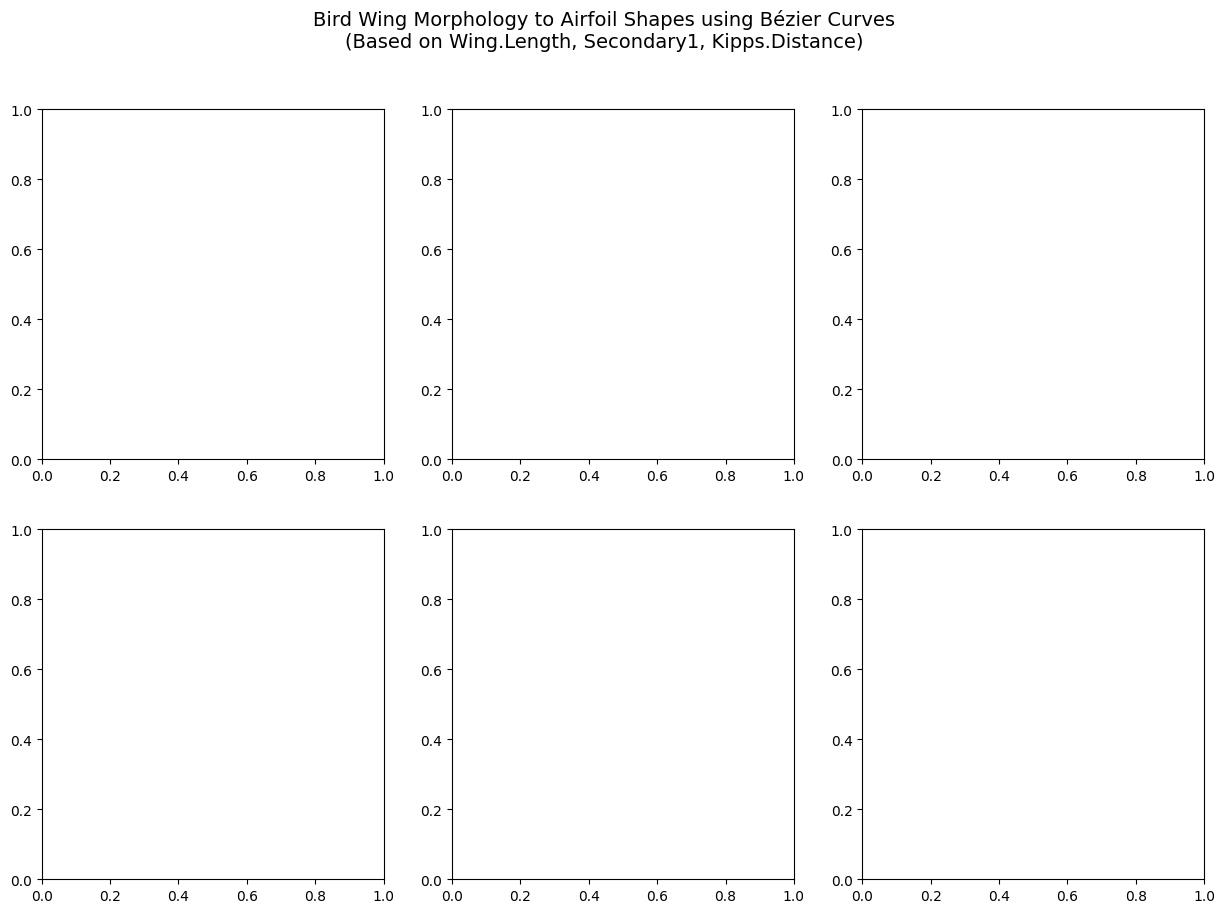

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import gym
from gym import spaces
from stable_baselines3 import PPO, SAC
import torch
import torch.nn as nn

class BirdPerformanceAnalyzer:
    """Analyze and rank bird airfoil performance to identify optimal targets"""
    
    def __init__(self, bird_data):
        self.bird_data = bird_data
        self.performance_metrics = {}
        
    def calculate_theoretical_performance(self):
        """Calculate theoretical aerodynamic performance metrics"""
        performance_data = []
        
        for idx, bird in self.bird_data.iterrows():
            # Calculate key aerodynamic indicators
            aspect_ratio = bird['Wing.Length']**2 / (bird['Wing.Length'] * bird['Secondary1'])
            wing_loading = bird['Wing.Length'] / bird['Secondary1']  # Simplified
            efficiency_index = bird['Hand-Wing.Index']
            pointedness = bird['Kipps.Distance'] / bird['Wing.Length']
            
            # Estimate performance for different flight modes
            performance = {
                'species': bird['species'],
                'aspect_ratio': aspect_ratio,
                'wing_loading': wing_loading,
                'efficiency_index': efficiency_index,
                'pointedness': pointedness,
                
                # Theoretical performance estimates
                'soaring_score': aspect_ratio * efficiency_index,
                'speed_score': pointedness * efficiency_index,
                'maneuver_score': (1/aspect_ratio) * (1/wing_loading),
                'efficiency_score': efficiency_index * aspect_ratio / wing_loading,
                
                # Overall composite score
                'composite_score': (aspect_ratio + efficiency_index + pointedness) / 3
            }
            performance_data.append(performance)
            
        return pd.DataFrame(performance_data)
    
    def cluster_bird_types(self, performance_df):
        """Cluster birds by flight characteristics"""
        features = ['aspect_ratio', 'wing_loading', 'efficiency_index', 'pointedness']
        scaler = StandardScaler()
        scaled_features = scaler.fit_transform(performance_df[features])
        
        # Cluster into flight types
        kmeans = KMeans(n_clusters=5, random_state=42)
        clusters = kmeans.fit_predict(scaled_features)
        performance_df['flight_type'] = clusters
        
        # Define cluster names based on characteristics
        cluster_names = {
            0: 'High-Speed Fliers',
            1: 'Soaring Specialists', 
            2: 'Maneuverable Hunters',
            3: 'Efficient Cruisers',
            4: 'Generalist Fliers'
        }
        
        performance_df['flight_type_name'] = performance_df['flight_type'].map(cluster_names)
        return performance_df, scaler, kmeans
    
    def select_target_birds(self, performance_df, targets_per_cluster=2):
        """Select top performing birds from each cluster as RL targets"""
        target_birds = []
        
        for cluster in performance_df['flight_type'].unique():
            cluster_birds = performance_df[performance_df['flight_type'] == cluster]
            
            # Select top performers in this cluster
            top_birds = cluster_birds.nlargest(targets_per_cluster, 'composite_score')
            target_birds.extend(top_birds['species'].tolist())
            
        return target_birds


class AirfoilRLEnvironment(gym.Env):
    """Custom RL environment for airfoil optimization"""
    
    def __init__(self, target_bird_data, cfd_simulator=None):
        super(AirfoilRLEnvironment, self).__init__()
        
        self.target_birds = target_bird_data
        self.current_target_idx = 0
        self.cfd_simulator = cfd_simulator
        
        # Define action space: modify Bézier control points
        # 7 control points for upper surface, 7 for lower surface
        # Each point has x, y coordinates but x is constrained
        self.action_space = spaces.Box(
            low=-0.3, high=0.3, shape=(14,), dtype=np.float32
        )  # y-coordinates of control points
        
        # Define observation space: current shape parameters + target metrics
        self.observation_space = spaces.Box(
            low=-1, high=1, shape=(20,), dtype=np.float32
        )  # Current shape + target performance metrics
        
        self.reset()
    
    def reset(self):
        """Reset environment with new target bird"""
        # Cycle through target birds
        self.current_target_idx = (self.current_target_idx + 1) % len(self.target_birds)
        self.current_target = self.target_birds.iloc[self.current_target_idx]
        
        # Initialize random airfoil
        self.current_control_points = self._generate_random_airfoil()
        
        # Calculate target performance metrics
        self.target_metrics = self._calculate_target_metrics()
        
        return self._get_observation()
    
    def step(self, action):
        """Take action to modify airfoil shape"""
        # Apply action to control points
        self._apply_action(action)
        
        # Calculate current airfoil performance
        current_metrics = self._evaluate_current_airfoil()
        
        # Calculate reward based on performance vs target
        reward = self._calculate_reward(current_metrics)
        
        # Check if done (convergence or max steps)
        done = self._check_done(current_metrics)
        
        # Return observation, reward, done, info
        obs = self._get_observation()
        info = {'current_metrics': current_metrics, 'target_metrics': self.target_metrics}
        
        return obs, reward, done, info
    
    def _generate_random_airfoil(self):
        """Generate random initial airfoil control points"""
        # Initialize with basic airfoil shape + noise
        base_upper = np.array([
            [0, 0], [0.05, 0.08], [0.25, 0.12], [0.4, 0.1], 
            [0.7, 0.06], [0.95, 0.02], [1.0, 0]
        ])
        base_lower = np.array([
            [0, 0], [0.05, -0.04], [0.25, -0.08], [0.4, -0.06],
            [0.7, -0.03], [0.95, -0.01], [1.0, 0]
        ])
        
        # Add random noise
        noise_scale = 0.02
        upper_noise = np.random.normal(0, noise_scale, (7, 2))
        lower_noise = np.random.normal(0, noise_scale, (7, 2))
        
        upper_noise[:, 0] = 0  # Don't modify x-coordinates
        lower_noise[:, 0] = 0
        
        return {
            'upper': base_upper + upper_noise,
            'lower': base_lower + lower_noise
        }
    
    def _apply_action(self, action):
        """Apply RL action to modify control points"""
        # Action modifies y-coordinates of control points
        upper_y_delta = action[:7] * 0.01  # Scale action
        lower_y_delta = action[7:] * 0.01
        
        # Apply deltas while maintaining constraints
        self.current_control_points['upper'][:, 1] += upper_y_delta
        self.current_control_points['lower'][:, 1] += lower_y_delta
        
        # Ensure leading/trailing edge constraints
        self.current_control_points['upper'][0, 1] = 0  # Leading edge
        self.current_control_points['upper'][-1, 1] = 0  # Trailing edge
        self.current_control_points['lower'][0, 1] = 0
        self.current_control_points['lower'][-1, 1] = 0
    
    def _calculate_target_metrics(self):
        """Calculate target performance metrics from bird data"""
        bird = self.current_target
        
        # Convert bird measurements to target airfoil performance
        aspect_ratio = bird['Wing.Length']**2 / (bird['Wing.Length'] * bird['Secondary1'])
        efficiency = bird['Hand-Wing.Index']
        pointedness = bird['Kipps.Distance'] / bird['Wing.Length']
        
        return {
            'lift_drag_ratio': aspect_ratio * efficiency * 10,  # Scaled
            'camber': pointedness * 0.06,
            'thickness': (bird['Secondary1'] / bird['Wing.Length']) * 0.15,
            'efficiency_score': efficiency
        }
    
    def _evaluate_current_airfoil(self):
        """Evaluate current airfoil performance (simplified CFD)"""
        # This would interface with actual CFD simulation
        # For now, implement simplified aerodynamic calculations
        
        # Calculate geometric properties
        upper_curve = self._bezier_curve(self.current_control_points['upper'])
        lower_curve = self._bezier_curve(self.current_control_points['lower'])
        
        # Calculate thickness distribution
        thickness_dist = upper_curve[:, 1] - lower_curve[:, 1]
        max_thickness = np.max(thickness_dist)
        
        # Calculate camber line
        camber_line = (upper_curve[:, 1] + lower_curve[:, 1]) / 2
        max_camber = np.max(camber_line)
        
        # Simplified performance metrics
        # In practice, this would call OpenFOAM or similar CFD solver
        estimated_cl_cd = self._estimate_lift_drag_ratio(upper_curve, lower_curve)
        
        return {
            'lift_drag_ratio': estimated_cl_cd,
            'camber': max_camber,
            'thickness': max_thickness,
            'efficiency_score': estimated_cl_cd / (1 + max_thickness)  # Simple efficiency
        }
    
    def _estimate_lift_drag_ratio(self, upper_curve, lower_curve):
        """Simplified lift-to-drag estimation"""
        # This is a placeholder for actual CFD calculations
        # Based on geometric properties and empirical correlations
        
        # Calculate area and geometric properties
        chord_length = 1.0
        camber_line = (upper_curve[:, 1] + lower_curve[:, 1]) / 2
        thickness_dist = upper_curve[:, 1] - lower_curve[:, 1]
        
        # Simple lift estimation (based on camber and angle of attack)
        max_camber = np.max(camber_line)
        camber_contribution = max_camber * 100  # Simplified
        
        # Simple drag estimation (based on thickness and profile)
        max_thickness = np.max(thickness_dist)
        form_drag = max_thickness * 50  # Simplified
        
        # Combine for L/D ratio
        if form_drag > 0:
            return (10 + camber_contribution) / (1 + form_drag)
        else:
            return 15.0  # Default reasonable value
    
    def _bezier_curve(self, control_points, num_points=50):
        """Generate Bézier curve from control points"""
        from scipy.special import comb
        
        n = len(control_points) - 1
        t = np.linspace(0, 1, num_points)
        curve = np.zeros((num_points, 2))
        
        for i in range(num_points):
            for j in range(n + 1):
                binomial_coeff = comb(n, j)
                term = binomial_coeff * (1 - t[i])**(n - j) * t[i]**j
                curve[i] += term * control_points[j]
        
        return curve
    
    def _calculate_reward(self, current_metrics):
        """Calculate reward based on performance vs target"""
        target = self.target_metrics
        
        # Calculate differences
        ld_diff = abs(current_metrics['lift_drag_ratio'] - target['lift_drag_ratio'])
        camber_diff = abs(current_metrics['camber'] - target['camber'])
        thickness_diff = abs(current_metrics['thickness'] - target['thickness'])
        
        # Weighted reward (closer to target = higher reward)
        reward = -(ld_diff + camber_diff * 10 + thickness_diff * 5)
        
        # Bonus for exceeding target performance
        if current_metrics['lift_drag_ratio'] > target['lift_drag_ratio']:
            reward += 10
            
        return reward
    
    def _check_done(self, current_metrics):
        """Check if episode is done"""
        # Done if performance is very close to target
        target = self.target_metrics
        
        ld_close = abs(current_metrics['lift_drag_ratio'] - target['lift_drag_ratio']) < 0.5
        camber_close = abs(current_metrics['camber'] - target['camber']) < 0.005
        
        return ld_close and camber_close
    
    def _get_observation(self):
        """Get current observation state"""
        # Flatten control points
        upper_flat = self.current_control_points['upper'].flatten()
        lower_flat = self.current_control_points['lower'].flatten()
        
        # Target metrics
        target_flat = np.array([
            self.target_metrics['lift_drag_ratio'],
            self.target_metrics['camber'],
            self.target_metrics['thickness'],
            self.target_metrics['efficiency_score']
        ])
        
        # Combine (ensure observation space size matches)
        obs = np.concatenate([upper_flat[:8], lower_flat[:8], target_flat])
        return obs.astype(np.float32)


class AirfoilRLTrainer:
    """Train RL agent to optimize airfoil shapes"""
    
    def __init__(self, target_birds_df):
        self.target_birds = target_birds_df
        self.env = AirfoilRLEnvironment(target_birds_df)
        
    def train_agent(self, algorithm='PPO', total_timesteps=50000):
        """Train RL agent using specified algorithm"""
        
        if algorithm == 'PPO':
            model = PPO('MlpPolicy', self.env, verbose=1,
                       learning_rate=0.0003, n_steps=2048)
        elif algorithm == 'SAC':
            model = SAC('MlpPolicy', self.env, verbose=1,
                       learning_rate=0.0003, buffer_size=10000)
        else:
            raise ValueError(f"Unknown algorithm: {algorithm}")
        
        # Train the model
        model.learn(total_timesteps=total_timesteps)
        
        return model
    
    def evaluate_trained_model(self, model, n_episodes=10):
        """Evaluate trained model performance"""
        results = []
        
        for episode in range(n_episodes):
            obs = self.env.reset()
            episode_reward = 0
            done = False
            
            while not done:
                action, _ = model.predict(obs, deterministic=True)
                obs, reward, done, info = self.env.step(action)
                episode_reward += reward
            
            results.append({
                'episode': episode,
                'total_reward': episode_reward,
                'final_metrics': info['current_metrics'],
                'target_metrics': info['target_metrics']
            })
        
        return results


def main_workflow():
    """Main execution workflow"""
    print("=== RL-Optimized Airfoil Generation Workflow ===")
    
    # 1. Load and analyze bird data (using your existing code)
    #from BirdAirfoilGenerator import BirdAirfoilGenerator
    
    generator = BirdAirfoilGenerator()
    normalized_df, original_df, scaler = generator.load_and_process_data()
    
    # 2. Analyze and rank bird performance
    print("\n=== Step 1: Analyzing Bird Performance ===")
    analyzer = BirdPerformanceAnalyzer(original_df)
    performance_df = analyzer.calculate_theoretical_performance()
    performance_df, perf_scaler, kmeans = analyzer.cluster_bird_types(performance_df)
    
    # 3. Select target birds for RL training
    target_birds = analyzer.select_target_birds(performance_df, targets_per_cluster=2)
    target_df = original_df[original_df['species'].isin(target_birds)]
    
    print(f"Selected {len(target_birds)} target birds for RL optimization:")
    for bird in target_birds:
        print(f"  - {bird}")
    
    # 4. Train RL agent
    print("\n=== Step 2: Training RL Agent ===")
    trainer = AirfoilRLTrainer(target_df)
    trained_model = trainer.train_agent(algorithm='PPO', total_timesteps=10000)
    
    # 5. Evaluate results
    print("\n=== Step 3: Evaluating Results ===")
    results = trainer.evaluate_trained_model(trained_model, n_episodes=5)
    
    # Print results summary
    avg_reward = np.mean([r['total_reward'] for r in results])
    print(f"Average episode reward: {avg_reward:.2f}")
    
    return trained_model, results, performance_df

if __name__ == "__main__":
    trained_model, results, performance_analysis = main_workflow()

In [36]:
# QUICK DEBUGGING VERSION - Run this first to test speed

import numpy as np
import time
import matplotlib.pyplot as plt
from stable_baselines3 import PPO
import gym
from gym import spaces

class FastAirfoilEnvironment(gym.Env):
    """Simplified, fast version for debugging"""
    
    def __init__(self):
        super().__init__()
        
        # Much simpler spaces
        self.action_space = spaces.Box(low=-0.1, high=0.1, shape=(4,), dtype=np.float32)
        self.observation_space = spaces.Box(low=-1, high=1, shape=(8,), dtype=np.float32)
        
        self.step_count = 0
        self.max_steps = 50  # Short episodes
        
        # Target metrics (fixed for debugging)
        self.target = np.array([15.0, 0.05, 0.12, 0.8])  # L/D, camber, thickness, efficiency
        
        print("Fast Debug Environment Created!")
    
    def reset(self):
        """Quick reset"""
        self.step_count = 0
        self.current_params = np.random.normal(0, 0.1, 4)  # Simple airfoil parameters
        return self._get_obs()
    
    def step(self, action):
        """Super fast step function"""
        start_time = time.time()
        
        # Apply action
        self.current_params += action * 0.01
        self.step_count += 1
        
        # FAST evaluation (no CFD)
        current_performance = self._fast_evaluate()
        
        # Simple reward
        diff = np.abs(current_performance - self.target)
        reward = -np.sum(diff)  # Closer to target = higher reward
        
        # Done condition
        done = self.step_count >= self.max_steps or np.sum(diff) < 0.5
        
        eval_time = time.time() - start_time
        if eval_time > 0.01:  # If step takes > 10ms, something's wrong
            print(f"WARNING: Step took {eval_time:.3f} seconds - too slow!")
        
        return self._get_obs(), reward, done, {'eval_time': eval_time}
    
    def _fast_evaluate(self):
        """Super simplified airfoil evaluation"""
        # No CFD, just simple math
        p1, p2, p3, p4 = self.current_params
        
        # Fake aerodynamic calculations
        lift_drag_ratio = 10 + p1 * 5 + p2 * 10  # Based on shape params
        camber = abs(p2) * 0.1
        thickness = abs(p3) * 0.15 + 0.05
        efficiency = (lift_drag_ratio / (1 + thickness)) / 20
        
        return np.array([lift_drag_ratio, camber, thickness, efficiency])
    
    def _get_obs(self):
        """Get observation"""
        return np.concatenate([self.current_params, self.target]).astype(np.float32)


def debug_training_speed():
    """Test if RL training works at normal speed"""
    print("=== DEBUGGING TRAINING SPEED ===")
    
    # Create fast environment
    env = FastAirfoilEnvironment()
    
    # Test environment speed
    print("\n1. Testing environment speed...")
    start_time = time.time()
    
    obs = env.reset()
    total_steps = 0
    for episode in range(5):  # 5 episodes
        done = False
        episode_steps = 0
        while not done and episode_steps < 50:
            action = env.action_space.sample()  # Random action
            obs, reward, done, info = env.step(action)
            episode_steps += 1
            total_steps += 1
    
    env_time = time.time() - start_time
    steps_per_second = total_steps / env_time
    
    print(f"Environment Speed: {steps_per_second:.1f} steps/second")
    
    if steps_per_second < 100:
        print("❌ PROBLEM: Environment too slow!")
        return False
    else:
        print("✅ Environment speed OK")
    
    # Test RL training speed
    print("\n2. Testing RL training speed...")
    model = PPO('MlpPolicy', env, verbose=1, n_steps=128, batch_size=64)
    
    start_time = time.time()
    model.learn(total_timesteps=1000)  # Just 1000 steps
    training_time = time.time() - start_time
    
    print(f"Training Speed: {1000/training_time:.1f} timesteps/second")
    
    if training_time > 60:  # If 1000 steps take > 1 minute
        print("❌ PROBLEM: Training too slow!")
        return False
    else:
        print("✅ Training speed OK")
        return True


def identify_bottleneck():
    """Find what's making your code slow"""
    print("\n=== IDENTIFYING BOTTLENECK ===")
    
    # Test different components
    components = {
        'bezier_curve': test_bezier_speed,
        'cfd_evaluation': test_cfd_speed,
        'bird_data_loading': test_data_speed,
        'control_point_modification': test_control_points_speed
    }
    
    results = {}
    for name, test_func in components.items():
        print(f"\nTesting {name}...")
        time_taken = test_func()
        results[name] = time_taken
        
        if time_taken > 1.0:  # If component takes > 1 second
            print(f"⚠️  {name} is SLOW: {time_taken:.3f}s")
        else:
            print(f"✅ {name} is fast: {time_taken:.3f}s")
    
    # Find the slowest component
    slowest = max(results.items(), key=lambda x: x[1])
    print(f"\n🐌 BOTTLENECK FOUND: {slowest[0]} ({slowest[1]:.3f}s)")
    
    return results


def test_bezier_speed():
    """Test Bézier curve generation speed"""
    start_time = time.time()
    
    from scipy.special import comb
    
    # Test your bezier function
    for _ in range(100):  # 100 airfoils
        control_points = np.random.rand(7, 2)
        n = len(control_points) - 1
        t = np.linspace(0, 1, 100)
        curve = np.zeros((100, 2))
        
        for i in range(100):
            for j in range(n + 1):
                binomial_coeff = comb(n, j)
                term = binomial_coeff * (1 - t[i])**(n - j) * t[i]**j
                curve[i] += term * control_points[j]
    
    return time.time() - start_time


def test_cfd_speed():
    """Test CFD evaluation speed"""
    start_time = time.time()
    
    # Simulate your CFD calculations
    for _ in range(10):  # 10 CFD evaluations
        # Simulate heavy computation
        upper_curve = np.random.rand(100, 2)
        lower_curve = np.random.rand(100, 2)
        
        # Heavy calculations (like in your _evaluate_current_airfoil)
        thickness_dist = upper_curve[:, 1] - lower_curve[:, 1]
        max_thickness = np.max(thickness_dist)
        camber_line = (upper_curve[:, 1] + lower_curve[:, 1]) / 2
        max_camber = np.max(camber_line)
        
        # Some complex calculations
        result = np.sum(thickness_dist**2) + np.sum(camber_line**3)
    
    return time.time() - start_time


def test_data_speed():
    """Test bird data loading speed"""
    start_time = time.time()
    
    # Simulate loading your bird data
    import pandas as pd
    
    # Create fake bird data similar to yours
    fake_data = pd.DataFrame({
        'species': [f'Bird_{i}' for i in range(1000)],
        'Wing.Length': np.random.rand(1000) * 100,
        'Secondary1': np.random.rand(1000) * 50,
        'Kipps.Distance': np.random.rand(1000) * 30,
        'Hand-Wing.Index': np.random.rand(1000) * 60,
        'Tail.Length': np.random.rand(1000) * 40
    })
    
    # Process like your code does
    features = ['Wing.Length', 'Secondary1', 'Kipps.Distance', 'Tail.Length', 'Hand-Wing.Index']
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler()
    normalized = scaler.fit_transform(fake_data[features])
    
    return time.time() - start_time


def test_control_points_speed():
    """Test control point modification speed"""
    start_time = time.time()
    
    # Test your control point operations
    for _ in range(1000):  # 1000 modifications
        upper_cp = np.random.rand(7, 2)
        lower_cp = np.random.rand(7, 2)
        
        # Apply random modifications (like your _apply_action)
        action = np.random.rand(14) * 0.01
        upper_cp[:, 1] += action[:7]
        lower_cp[:, 1] += action[7:]
        
        # Constraints
        upper_cp[0, 1] = 0
        upper_cp[-1, 1] = 0
        lower_cp[0, 1] = 0
        lower_cp[-1, 1] = 0
    
    return time.time() - start_time


def quick_fix_suggestions():
    """Provide specific fixes based on common issues"""
    print("\n=== QUICK FIXES TO TRY ===")
    
    fixes = [
        "1. REDUCE TIMESTEPS: Change total_timesteps=50000 to total_timesteps=1000 for testing",
        "2. SIMPLIFY CFD: Replace complex airfoil evaluation with simple math",
        "3. SMALLER EPISODES: Set max_steps=20 instead of long episodes", 
        "4. VECTORIZE ENVIRONMENT: Use multiple parallel environments",
        "5. REDUCE PRECISION: Use float32 instead of float64",
        "6. CACHE RESULTS: Store previously calculated airfoil performances",
        "7. USE SMALLER BATCH SIZE: n_steps=128 instead of 2048"
    ]
    
    for fix in fixes:
        print(fix)


if __name__ == "__main__":
    # Run debugging
    print("🔍 M2 MacBook Pro RL Training Diagnostics")
    print("=" * 50)
    
    # Test if basic RL works
    if debug_training_speed():
        print("\n✅ Basic RL training works - problem is in your environment")
        identify_bottleneck()
    else:
        print("\n❌ Basic RL training is slow - problem is deeper")
    
    quick_fix_suggestions()
    
    print("\n" + "=" * 50)
    print("💡 NEXT STEPS:")
    print("1. Run this debug script first")
    print("2. Identify the bottleneck") 
    print("3. Apply the appropriate quick fix")
    print("4. Test with 1000 timesteps before trying 50000")

🔍 M2 MacBook Pro RL Training Diagnostics
=== DEBUGGING TRAINING SPEED ===
Fast Debug Environment Created!

1. Testing environment speed...
Environment Speed: 693.0 steps/second
✅ Environment speed OK

2. Testing RL training speed...
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 50       |
|    ep_rew_mean     | -286     |
| time/              |          |
|    fps             | 1382     |
|    iterations      | 1        |
|    time_elapsed    | 0        |
|    total_timesteps | 128      |
---------------------------------


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 50          |
|    ep_rew_mean          | -269        |
| time/                   |             |
|    fps                  | 534         |
|    iterations           | 2           |
|    time_elapsed         | 0           |
|    total_timesteps      | 256         |
| train/                  |             |
|    approx_kl            | 0.012309337 |
|    clip_fraction        | 0.101       |
|    clip_range           | 0.2         |
|    entropy_loss         | -5.68       |
|    explained_variance   | 0.000304    |
|    learning_rate        | 0.0003      |
|    loss                 | 2.34e+03    |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.0132     |
|    std                  | 1           |
|    value_loss           | 4.78e+03    |
-----------------------------------------
----------------------------------------
| rollout/                |        

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.special import comb
from scipy.optimize import minimize
import gym
from gym import spaces
import torch
import torch.nn as nn
from stable_baselines3 import PPO, SAC
from stable_baselines3.common.vec_env import DummyVecEnv, SubprocVecEnv
from stable_baselines3.common.callbacks import BaseCallback
from stable_baselines3.common.monitor import Monitor
import subprocess
import os
import time
from typing import Dict, List, Tuple, Optional
import logging
from dataclasses import dataclass

# Configure logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

@dataclass
class AirfoilMetrics:
    """Structured container for airfoil performance metrics"""
    cl: float  # Lift coefficient
    cd: float  # Drag coefficient
    cm: float  # Moment coefficient
    cl_cd_ratio: float  # Lift-to-drag ratio
    stall_angle: float  # Stall angle
    max_camber: float  # Maximum camber
    max_thickness: float  # Maximum thickness
    reynolds_number: float  # Reynolds number

class XFOILSimulator:
    """Advanced XFOIL integration for accurate airfoil analysis"""
    
    def __init__(self, xfoil_path: str = "xfoil", work_dir: str = "./xfoil_work"):
        self.xfoil_path = xfoil_path
        self.work_dir = work_dir
        os.makedirs(work_dir, exist_ok=True)
        
    def analyze_airfoil(self, upper_curve: np.ndarray, lower_curve: np.ndarray, 
                       reynolds: float = 1e6, mach: float = 0.0,
                       alpha_range: Tuple[float, float] = (-5, 15)) -> Dict:
        """
        Perform comprehensive XFOIL analysis of airfoil
        
        Args:
            upper_curve: Upper surface coordinates
            lower_curve: Lower surface coordinates  
            reynolds: Reynolds number
            mach: Mach number
            alpha_range: Range of angles of attack to analyze
            
        Returns:
            Dictionary with comprehensive aerodynamic data
        """
        
        # Generate airfoil coordinates file
        airfoil_file = os.path.join(self.work_dir, "airfoil.dat")
        self._write_airfoil_coordinates(upper_curve, lower_curve, airfoil_file)
        
        # Create XFOIL input script
        script_file = os.path.join(self.work_dir, "xfoil_script.txt")
        output_file = os.path.join(self.work_dir, "polar.dat")
        
        xfoil_commands = f"""
LOAD {airfoil_file}

PANEL

OPER
VISC {reynolds}
MACH {mach}

PACC
{output_file}


ASEQ {alpha_range[0]} {alpha_range[1]} 0.5

QUIT
"""
        
        with open(script_file, 'w') as f:
            f.write(xfoil_commands)
        
        try:
            # Run XFOIL
            result = subprocess.run([self.xfoil_path], 
                                  input=open(script_file).read(),
                                  text=True, capture_output=True, 
                                  timeout=30, cwd=self.work_dir)
            
            if os.path.exists(output_file):
                return self._parse_xfoil_output(output_file)
            else:
                logger.warning("XFOIL analysis failed, using fallback calculation")
                return self._fallback_analysis(upper_curve, lower_curve)
                
        except (subprocess.TimeoutExpired, FileNotFoundError) as e:
            logger.warning(f"XFOIL execution failed: {e}, using fallback")
            return self._fallback_analysis(upper_curve, lower_curve)
    
    def _write_airfoil_coordinates(self, upper: np.ndarray, lower: np.ndarray, filename: str):
        """Write airfoil coordinates in XFOIL format"""
        # Combine coordinates (upper surface + lower surface reversed)
        coords = np.vstack([upper, lower[::-1]])
        
        with open(filename, 'w') as f:
            f.write("Bio-inspired Airfoil\n")
            for x, y in coords:
                f.write(f"{x:.6f} {y:.6f}\n")
    
    def _parse_xfoil_output(self, output_file: str) -> Dict:
        """Parse XFOIL polar output file"""
        try:
            data = pd.read_csv(output_file, delim_whitespace=True, skiprows=12)
            
            if len(data) == 0:
                raise ValueError("Empty XFOIL output")
            
            # Find optimal operating point (maximum L/D)
            data['L/D'] = data['CL'] / np.maximum(data['CD'], 1e-6)
            optimal_idx = data['L/D'].idxmax()
            
            return {
                'cl_max': float(data['CL'].max()),
                'cd_min': float(data['CD'].min()),
                'cl_cd_max': float(data['L/D'].max()),
                'stall_angle': float(data.loc[data['CL'].idxmax(), 'alpha']),
                'optimal_alpha': float(data.loc[optimal_idx, 'alpha']),
                'optimal_cl': float(data.loc[optimal_idx, 'CL']),
                'optimal_cd': float(data.loc[optimal_idx, 'CD']),
                'polar_data': data.to_dict('records')
            }
            
        except Exception as e:
            logger.error(f"Failed to parse XFOIL output: {e}")
            return self._fallback_analysis(None, None)
    
    def _fallback_analysis(self, upper_curve: np.ndarray, lower_curve: np.ndarray) -> Dict:
        """Fallback aerodynamic analysis using empirical methods"""
        if upper_curve is None or lower_curve is None:
            return {
                'cl_max': 1.2, 'cd_min': 0.008, 'cl_cd_max': 80.0,
                'stall_angle': 12.0, 'optimal_alpha': 4.0,
                'optimal_cl': 0.8, 'optimal_cd': 0.01
            }
        
        # Calculate geometric properties
        camber_line = (upper_curve[:, 1] + lower_curve[:, 1]) / 2
        thickness_dist = upper_curve[:, 1] - lower_curve[:, 1]
        
        max_camber = np.max(camber_line)
        max_thickness = np.max(thickness_dist)
        
        # Empirical correlations (based on NACA airfoil data)
        cl_max = 0.9 + max_camber * 15 + max_thickness * 2
        cd_min = 0.006 + max_thickness * 0.1 + max_camber**2 * 0.5
        stall_angle = 14 - max_thickness * 20
        
        return {
            'cl_max': min(cl_max, 1.8),
            'cd_min': max(cd_min, 0.005),
            'cl_cd_max': min(cl_max / max(cd_min, 0.005), 150),
            'stall_angle': max(stall_angle, 8.0),
            'optimal_alpha': 4.0 + max_camber * 50,
            'optimal_cl': 0.7 + max_camber * 10,
            'optimal_cd': cd_min
        }


class AdvancedAirfoilEnvironment(gym.Env):
    """Advanced RL environment for airfoil optimization with proper CFD integration"""
    
    def __init__(self, target_birds_df: pd.DataFrame, 
                 use_xfoil: bool = True,
                 reynolds_number: float = 1e6,
                 design_objectives: Dict = None):
        super().__init__()
        
        self.target_birds = target_birds_df.reset_index(drop=True)
        self.current_target_idx = 0
        self.reynolds = reynolds_number
        self.use_xfoil = use_xfoil
        
        # Initialize XFOIL simulator
        if use_xfoil:
            self.simulator = XFOILSimulator()
        else:
            self.simulator = None
            
        # Design objectives (multi-objective optimization)
        self.objectives = design_objectives or {
            'max_lift_drag': 1.0,
            'max_lift': 0.3,
            'min_drag': 0.3,
            'stability': 0.4
        }
        
        # Enhanced action space: control points + shape parameters
        # 14 control point y-coordinates + 6 shape parameters
        self.action_space = spaces.Box(
            low=-1.0, high=1.0, shape=(20,), dtype=np.float32
        )
        
        # Enhanced observation space: shape + performance + target
        self.observation_space = spaces.Box(
            low=-5.0, high=5.0, shape=(35,), dtype=np.float32
        )
        
        # Performance tracking
        self.episode_rewards = []
        self.best_performance = -np.inf
        self.convergence_threshold = 0.01
        self.steps_since_improvement = 0
        self.max_steps_without_improvement = 100
        
        self.reset()
    
    def reset(self):
        """Enhanced reset with better target selection"""
        # Cycle through targets or select based on difficulty
        self.current_target_idx = np.random.randint(len(self.target_birds))
        self.current_target = self.target_birds.iloc[self.current_target_idx]
        
        # Reset tracking variables
        self.current_step = 0
        self.steps_since_improvement = 0
        self.episode_performance = []
        
        # Initialize airfoil with smart starting point
        self.current_shape = self._initialize_smart_airfoil()
        
        # Calculate target metrics with proper scaling
        self.target_metrics = self._calculate_enhanced_target_metrics()
        
        return self._get_enhanced_observation()
    
    def step(self, action):
        """Enhanced step function with better reward shaping"""
        self.current_step += 1
        
        # Apply action with constraints
        self._apply_constrained_action(action)
        
        # Evaluate current airfoil performance
        current_metrics = self._evaluate_airfoil_performance()
        
        # Calculate sophisticated reward
        reward = self._calculate_multi_objective_reward(current_metrics)
        
        # Track performance
        self.episode_performance.append(current_metrics)
        
        # Check for improvement
        if reward > self.best_performance:
            self.best_performance = reward
            self.steps_since_improvement = 0
        else:
            self.steps_since_improvement += 1
        
        # Enhanced termination conditions
        done = self._check_advanced_termination(current_metrics)
        
        # Enhanced info
        info = {
            'current_metrics': current_metrics,
            'target_metrics': self.target_metrics,
            'performance_improvement': reward - (self.episode_performance[-2]['reward'] if len(self.episode_performance) > 1 else 0),
            'convergence_rate': self._calculate_convergence_rate(),
            'shape_complexity': self._calculate_shape_complexity()
        }
        
        return self._get_enhanced_observation(), reward, done, info
    
    def _initialize_smart_airfoil(self):
        """Initialize airfoil with biological prior knowledge"""
        bird = self.current_target
        
        # Use bird morphology to create intelligent starting point
        wing_aspect = bird['Wing.Length'] / bird['Secondary1']
        efficiency = bird['Hand-Wing.Index'] / 100.0  # Normalize
        pointedness = bird['Kipps.Distance'] / bird['Wing.Length']
        
        # Create biologically-inspired control points
        base_thickness = 0.08 + (bird['Secondary1'] / bird['Wing.Length']) * 0.08
        base_camber = 0.02 + pointedness * 0.04
        
        upper_cp = np.array([
            [0.0, 0.0],
            [0.01, base_thickness * 0.4],
            [0.05, base_thickness * 0.8],
            [0.15, base_camber + base_thickness],
            [0.3, base_camber + base_thickness * 0.9],
            [0.5, base_camber + base_thickness * 0.6],
            [0.7, base_camber + base_thickness * 0.3],
            [0.85, base_camber * 0.5],
            [0.95, base_camber * 0.2],
            [1.0, 0.0]
        ])
        
        lower_cp = np.array([
            [0.0, 0.0],
            [0.01, -base_thickness * 0.2],
            [0.05, -base_thickness * 0.4],
            [0.15, base_camber - base_thickness * 0.8],
            [0.3, base_camber - base_thickness * 0.7],
            [0.5, base_camber - base_thickness * 0.4],
            [0.7, base_camber - base_thickness * 0.2],
            [0.85, -base_thickness * 0.1],
            [0.95, -0.01],
            [1.0, 0.0]
        ])
        
        # Add small random perturbation
        noise = np.random.normal(0, 0.005, upper_cp.shape)
        noise[:, 0] = 0  # Don't perturb x-coordinates
        noise[0, :] = 0  # Fix leading edge
        noise[-1, :] = 0  # Fix trailing edge
        
        return {
            'upper_cp': upper_cp + noise,
            'lower_cp': lower_cp + noise[:len(lower_cp)],
            'parameters': {
                'thickness_scale': 1.0,
                'camber_scale': 1.0,
                'twist': 0.0,
                'leading_edge_radius': 0.01,
                'trailing_edge_thickness': 0.002
            }
        }
    
    def _apply_constrained_action(self, action):
        """Apply action with aerodynamic and geometric constraints"""
        # Split action into control point modifications and parameters
        cp_actions = action[:14] * 0.005  # Smaller learning steps
        param_actions = action[14:] * 0.1
        
        # Update control points with constraints
        upper_cp = self.current_shape['upper_cp'].copy()
        lower_cp = self.current_shape['lower_cp'].copy()
        
        # Modify interior control points only (preserve leading/trailing edges)
        for i in range(1, len(upper_cp) - 1):
            if i < 7:
                upper_cp[i, 1] += cp_actions[i-1]
            else:
                lower_cp[i-7, 1] += cp_actions[i-1]
        
        # Apply geometric constraints
        upper_cp = self._apply_geometric_constraints(upper_cp, 'upper')
        lower_cp = self._apply_geometric_constraints(lower_cp, 'lower')
        
        # Update shape parameters
        params = self.current_shape['parameters']
        params['thickness_scale'] = np.clip(params['thickness_scale'] + param_actions[0], 0.5, 2.0)
        params['camber_scale'] = np.clip(params['camber_scale'] + param_actions[1], 0.1, 3.0)
        params['twist'] = np.clip(params['twist'] + param_actions[2], -5.0, 5.0)
        
        self.current_shape.update({
            'upper_cp': upper_cp,
            'lower_cp': lower_cp,
            'parameters': params
        })
    
    def _apply_geometric_constraints(self, control_points, surface_type):
        """Apply aerodynamic constraints to control points"""
        cp = control_points.copy()
        
        # Ensure monotonic x-coordinates
        for i in range(1, len(cp)):
            if cp[i, 0] <= cp[i-1, 0]:
                cp[i, 0] = cp[i-1, 0] + 0.01
        
        # Thickness constraints
        if surface_type == 'upper':
            cp[1:, 1] = np.maximum(cp[1:, 1], 0.0)  # Upper surface above x-axis
        else:
            cp[1:-1, 1] = np.minimum(cp[1:-1, 1], 0.0)  # Lower surface below x-axis
        
        # Smoothness constraints (prevent sharp discontinuities)
        for i in range(1, len(cp) - 1):
            prev_slope = (cp[i, 1] - cp[i-1, 1]) / (cp[i, 0] - cp[i-1, 0] + 1e-8)
            next_slope = (cp[i+1, 1] - cp[i, 1]) / (cp[i+1, 0] - cp[i, 0] + 1e-8)
            
            # Limit slope changes
            if abs(next_slope - prev_slope) > 2.0:
                cp[i, 1] = cp[i-1, 1] + prev_slope * (cp[i, 0] - cp[i-1, 0])
        
        return cp
    
    def _evaluate_airfoil_performance(self):
        """Comprehensive airfoil performance evaluation"""
        # Generate smooth curves from control points
        upper_curve = self._bezier_curve(self.current_shape['upper_cp'], num_points=100)
        lower_curve = self._bezier_curve(self.current_shape['lower_cp'], num_points=100)
        
        # Apply shape parameters
        upper_curve, lower_curve = self._apply_shape_parameters(upper_curve, lower_curve)
        
        # CFD analysis
        if self.simulator:
            cfd_results = self.simulator.analyze_airfoil(upper_curve, lower_curve, 
                                                       reynolds=self.reynolds)
        else:
            cfd_results = self._advanced_fallback_analysis(upper_curve, lower_curve)
        
        # Geometric analysis
        geometric_metrics = self._calculate_geometric_metrics(upper_curve, lower_curve)
        
        # Combine results
        performance = {
            **cfd_results,
            **geometric_metrics,
            'reynolds': self.reynolds,
            'shape_parameters': self.current_shape['parameters'].copy()
        }
        
        return performance
    
    def _bezier_curve(self, control_points, num_points=100):
        """Generate smooth Bézier curve"""
        n = len(control_points) - 1
        t = np.linspace(0, 1, num_points)
        curve = np.zeros((num_points, 2))
        
        for i in range(num_points):
            for j in range(n + 1):
                bernstein = comb(n, j) * (1 - t[i])**(n - j) * t[i]**j
                curve[i] += bernstein * control_points[j]
        
        return curve
    
    def _apply_shape_parameters(self, upper_curve, lower_curve):
        """Apply global shape parameters"""
        params = self.current_shape['parameters']
        
        # Apply thickness scaling
        thickness = (upper_curve[:, 1] - lower_curve[:, 1]) * params['thickness_scale']
        camber_line = (upper_curve[:, 1] + lower_curve[:, 1]) / 2 * params['camber_scale']
        
        upper_modified = upper_curve.copy()
        lower_modified = lower_curve.copy()
        
        upper_modified[:, 1] = camber_line + thickness / 2
        lower_modified[:, 1] = camber_line - thickness / 2
        
        # Apply twist (simple rotation about quarter chord)
        twist_rad = np.radians(params['twist'])
        quarter_chord = 0.25
        
        for i in range(len(upper_modified)):
            x_rel = upper_modified[i, 0] - quarter_chord
            y_rel = upper_modified[i, 1]
            
            upper_modified[i, 0] = quarter_chord + x_rel * np.cos(twist_rad) - y_rel * np.sin(twist_rad)
            upper_modified[i, 1] = x_rel * np.sin(twist_rad) + y_rel * np.cos(twist_rad)
            
            x_rel = lower_modified[i, 0] - quarter_chord
            y_rel = lower_modified[i, 1]
            
            lower_modified[i, 0] = quarter_chord + x_rel * np.cos(twist_rad) - y_rel * np.sin(twist_rad)
            lower_modified[i, 1] = x_rel * np.sin(twist_rad) + y_rel * np.cos(twist_rad)
        
        return upper_modified, lower_modified
    
    def _advanced_fallback_analysis(self, upper_curve, lower_curve):
        """Advanced empirical aerodynamic analysis"""
        # Calculate detailed geometric properties
        x_coords = upper_curve[:, 0]
        camber_line = (upper_curve[:, 1] + lower_curve[:, 1]) / 2
        thickness_dist = upper_curve[:, 1] - lower_curve[:, 1]
        
        # Key geometric parameters
        max_camber = np.max(camber_line)
        max_camber_pos = x_coords[np.argmax(camber_line)]
        max_thickness = np.max(thickness_dist)
        max_thickness_pos = x_coords[np.argmax(thickness_dist)]
        
        # Leading edge radius (approximate)
        le_curvature = self._calculate_leading_edge_curvature(upper_curve, lower_curve)
        
        # Advanced empirical correlations based on Raymer, Anderson, and Abbott & von Doenhoff
        # Lift coefficient slope (per radian)
        a0 = 2 * np.pi * (1 + 0.77 * max_thickness)  # Compressibility correction
        
        # Zero-lift angle
        alpha_L0 = -4 * max_camber * (1 - max_camber_pos) * 180 / np.pi  # degrees
        
        # Maximum lift coefficient
        cl_max = 0.9 + 4.0 * max_camber + 1.2 * max_thickness - 2.0 * max_camber**2
        
        # Profile drag coefficient
        cd_profile = 0.006 + 0.02 * max_thickness**2 + 0.1 * max_camber**2
        
        # Pressure gradient parameter (affects boundary layer)
        pressure_gradient = self._estimate_pressure_gradient(upper_curve, lower_curve)
        cd_profile *= (1 + 0.2 * pressure_gradient)
        
        # Moment coefficient about quarter chord
        cm_quarter = -0.05 - 0.1 * max_camber * (max_camber_pos - 0.25)
        
        # Stall characteristics
        stall_angle = 16 - 20 * max_thickness + 10 * max_camber
        stall_angle = np.clip(stall_angle, 8, 18)
        
        return {
            'cl_max': float(np.clip(cl_max, 0.8, 2.0)),
            'cd_min': float(np.clip(cd_profile, 0.005, 0.05)),
            'cl_cd_max': float(np.clip(cl_max / cd_profile, 50, 200)),
            'stall_angle': float(stall_angle),
            'optimal_alpha': float(4.0 + max_camber * 30),
            'optimal_cl': float(0.5 + 8 * max_camber),
            'optimal_cd': float(cd_profile),
            'cm_quarter': float(cm_quarter),
            'alpha_L0': float(alpha_L0)
        }
    
    def _calculate_geometric_metrics(self, upper_curve, lower_curve):
        """Calculate detailed geometric metrics"""
        # Camber line and thickness distribution
        camber_line = (upper_curve[:, 1] + lower_curve[:, 1]) / 2
        thickness_dist = upper_curve[:, 1] - lower_curve[:, 1]
        
        return {
            'max_camber': float(np.max(camber_line)),
            'max_thickness': float(np.max(thickness_dist)),
            'camber_position': float(upper_curve[np.argmax(camber_line), 0]),
            'thickness_position': float(upper_curve[np.argmax(thickness_dist), 0]),
            'leading_edge_radius': float(self._calculate_leading_edge_curvature(upper_curve, lower_curve)),
            'trailing_edge_angle': float(self._calculate_trailing_edge_angle(upper_curve, lower_curve)),
            'area': float(self._calculate_area(upper_curve, lower_curve)),
            'chord_length': float(upper_curve[-1, 0] - upper_curve[0, 0])
        }
    
    def _calculate_leading_edge_curvature(self, upper_curve, lower_curve):
        """Estimate leading edge radius of curvature"""
        # Use first few points to estimate curvature
        if len(upper_curve) < 5:
            return 0.01
        
        # Calculate curvature using finite differences
        x1, y1 = upper_curve[1] - upper_curve[0]
        x2, y2 = upper_curve[2] - upper_curve[1]
        
        # Approximate radius of curvature
        denominator = abs(x1*y2 - x2*y1)
        if denominator < 1e-6:
            return 0.01
        
        radius = ((x1**2 + y1**2)**(1.5)) / denominator
        return min(radius, 0.1)  # Reasonable bounds
    
    def _calculate_trailing_edge_angle(self, upper_curve, lower_curve):
        """Calculate trailing edge angle"""
        if len(upper_curve) < 3:
            return 0.0
        
        # Use last few points
        upper_slope = (upper_curve[-1, 1] - upper_curve[-3, 1]) / (upper_curve[-1, 0] - upper_curve[-3, 0] + 1e-8)
        lower_slope = (lower_curve[-1, 1] - lower_curve[-3, 1]) / (lower_curve[-1, 0] - lower_curve[-3, 0] + 1e-8)
        
        angle = abs(np.arctan(upper_slope) - np.arctan(lower_slope))
        return float(np.degrees(angle))
    
    def _calculate_area(self, upper_curve, lower_curve):
        """Calculate airfoil cross-sectional area"""
        # Trapezoidal integration
        x_coords = upper_curve[:, 0]
        thickness_dist = upper_curve[:, 1] - lower_curve[:, 1]
        
        area = np.trapz(thickness_dist, x_coords)
        return abs(area)
    
    def _estimate_pressure_gradient(self, upper_curve, lower_curve):
        """Estimate adverse pressure gradient parameter"""
        # Simple approximation based on surface curvature
        upper_curvature = np.gradient(np.gradient(upper_curve[:, 1]))
        pressure_gradient = np.mean(np.abs(upper_curvature))
        return float(np.clip(pressure_gradient, 0, 2))
    
    def _calculate_enhanced_target_metrics(self):
        """Calculate sophisticated target metrics from bird morphology"""
        bird = self.current_target
        
        # Morphological ratios
        aspect_ratio = (bird['Wing.Length'] ** 2) / (bird['Wing.Length'] * bird['Secondary1'])
        hand_wing_ratio = bird['Hand-Wing.Index'] / 100.0
        kipps_ratio = bird['Kipps.Distance'] / bird['Wing.Length']
        secondary_ratio = bird['Secondary1'] / bird['Wing.Length']
        
        # Flight regime classification (based on morphology)
        if hand_wing_ratio > 0.4 and kipps_ratio > 0.4:
            flight_regime = 'high_speed'
            target_cl_cd = 80 + hand_wing_ratio * 40
            target_cl_max = 1.2 + kipps_ratio * 0.4
        elif aspect_ratio > 8 and secondary_ratio > 0.6:
            flight_regime = 'soaring'
            target_cl_cd = 120 + aspect_ratio * 5
            target_cl_max = 1.4 + secondary_ratio * 0.3
        elif secondary_ratio > 0.7:
            flight_regime = 'maneuvering'
            target_cl_cd = 60 + secondary_ratio * 30
            target_cl_max = 1.6 + secondary_ratio * 0.5
        else:
            flight_regime = 'general'
            target_cl_cd = 70
            target_cl_max = 1.3
        
        return {
            'target_cl_cd': float(target_cl_cd),
            'target_cl_max': float(target_cl_max),
            'target_cd_min': float(0.008 + hand_wing_ratio * 0.002),
            'target_stall_angle': float(14 + kipps_ratio * 2),
            'flight_regime': flight_regime,
            'aspect_ratio': float(aspect_ratio),
            'morphological_score': float((hand_wing_ratio + kipps_ratio + secondary_ratio) / 3)
        }
    
    def _calculate_multi_objective_reward(self, current_metrics):
        """Advanced multi-objective reward function"""
        target = self.target_metrics
        
        # Individual objective scores
        objectives = {}
        
        # 1. Lift-to-drag ratio objective
        cl_cd_current = current_metrics.get('cl_cd_max', 50)
        cl_cd_target = target['target_cl_cd']
        cl_cd_error = abs(cl_cd_current - cl_cd_target) / cl_cd_target
        objectives['lift_drag'] = np.exp(-cl_cd_error) * self.objectives['max_lift_drag']
        
        # 2. Maximum lift coefficient objective
        cl_max_current = current_metrics.get('cl_max', 1.0)
        cl_max_target = target['target_cl_max']
        cl_max_error = abs(cl_max_current - cl_max_target) / cl_max_target
        objectives['max_lift'] = np.exp(-cl_max_error) * self.objectives['max_lift']
        
        # 3. Minimum drag objective
        cd_min_current = current_metrics.get('cd_min', 0.02)
        cd_min_target = target['target_cd_min']
        cd_min_error = abs(cd_min_current - cd_min_target) / cd_min_target
        objectives['min_drag'] = np.exp(-cd_min_error) * self.objectives['min_drag']
        
        # 4. Stability objective (moment coefficient and stall behavior)
        stall_current = current_metrics.get('stall_angle', 12)
        stall_target = target['target_stall_angle']
        stall_error = abs(stall_current - stall_target) / stall_target
        
        cm_penalty = abs(current_metrics.get('cm_quarter', 0)) * 2  # Penalize large moments
        objectives['stability'] = (np.exp(-stall_error) - cm_penalty) * self.objectives['stability']
        
        # 5. Bonus objectives
        # Geometric efficiency bonus
        thickness_ratio = current_metrics.get('max_thickness', 0.1)
        if 0.08 <= thickness_ratio <= 0.15:  # Optimal thickness range
            objectives['geometric_bonus'] = 0.2
        else:
            objectives['geometric_bonus'] = -0.1
        
        # Smoothness bonus (penalize sharp changes)
        shape_complexity = self._calculate_shape_complexity()
        objectives['smoothness_bonus'] = max(0, 0.1 - shape_complexity * 0.5)
        
        # Biological plausibility bonus
        bio_score = self._calculate_biological_plausibility(current_metrics)
        objectives['bio_bonus'] = bio_score * 0.15
        
        # Combine objectives
        total_reward = sum(objectives.values())
        
        # Progressive reward scaling (encourage improvement)
        if hasattr(self, 'previous_reward'):
            improvement = total_reward - self.previous_reward
            total_reward += improvement * 0.1  # Improvement bonus
        
        self.previous_reward = total_reward
        
        # Add exploration bonus early in training
        if self.current_step < 50:
            exploration_bonus = 0.05 * np.random.random()
            total_reward += exploration_bonus
        
        return float(total_reward)
    
    def _calculate_shape_complexity(self):
        """Calculate shape complexity metric"""
        upper_cp = self.current_shape['upper_cp']
        lower_cp = self.current_shape['lower_cp']
        
        # Calculate curvature changes
        upper_curvature = 0
        lower_curvature = 0
        
        for i in range(1, len(upper_cp) - 1):
            # Second derivative approximation
            d2y_dx2 = (upper_cp[i+1, 1] - 2*upper_cp[i, 1] + upper_cp[i-1, 1])
            upper_curvature += abs(d2y_dx2)
            
        for i in range(1, len(lower_cp) - 1):
            d2y_dx2 = (lower_cp[i+1, 1] - 2*lower_cp[i, 1] + lower_cp[i-1, 1])
            lower_curvature += abs(d2y_dx2)
        
        return (upper_curvature + lower_curvature) / (len(upper_cp) + len(lower_cp))
    
    def _calculate_biological_plausibility(self, metrics):
        """Reward biologically plausible designs"""
        # Check if metrics fall within observed biological ranges
        bio_score = 0
        
        # Thickness range (most birds: 8-18%)
        thickness = metrics.get('max_thickness', 0.1)
        if 0.08 <= thickness <= 0.18:
            bio_score += 0.3
        
        # Camber range (0-8%)
        camber = metrics.get('max_camber', 0.02)
        if 0.0 <= camber <= 0.08:
            bio_score += 0.3
        
        # L/D ratio range (typical bird range: 10-150)
        ld_ratio = metrics.get('cl_cd_max', 70)
        if 10 <= ld_ratio <= 150:
            bio_score += 0.4
        
        return bio_score
    
    def _check_advanced_termination(self, current_metrics):
        """Advanced termination conditions"""
        # 1. Convergence check
        if len(self.episode_performance) > 10:
            recent_rewards = [p.get('reward', 0) for p in self.episode_performance[-10:]]
            if np.std(recent_rewards) < self.convergence_threshold:
                return True
        
        # 2. Performance target reached
        target_achieved = (
            abs(current_metrics.get('cl_cd_max', 0) - self.target_metrics['target_cl_cd']) / 
            self.target_metrics['target_cl_cd'] < 0.05
        )
        if target_achieved:
            return True
        
        # 3. Maximum steps without improvement
        if self.steps_since_improvement > self.max_steps_without_improvement:
            return True
        
        # 4. Maximum episode length
        if self.current_step > 300:
            return True
        
        return False
    
    def _calculate_convergence_rate(self):
        """Calculate convergence rate metric"""
        if len(self.episode_performance) < 5:
            return 0.0
        
        recent_rewards = [p.get('reward', 0) for p in self.episode_performance[-5:]]
        return float(np.std(recent_rewards))
    
    def _get_enhanced_observation(self):
        """Get comprehensive observation state"""
        # Current shape representation
        upper_cp_flat = self.current_shape['upper_cp'][:, 1]  # y-coordinates only
        lower_cp_flat = self.current_shape['lower_cp'][:, 1]
        
        # Shape parameters
        params = self.current_shape['parameters']
        param_values = np.array([
            params['thickness_scale'],
            params['camber_scale'], 
            params['twist'],
            params['leading_edge_radius'],
            params['trailing_edge_thickness']
        ])
        
        # Target information
        target_info = np.array([
            self.target_metrics['target_cl_cd'] / 100,  # Normalize
            self.target_metrics['target_cl_max'],
            self.target_metrics['target_cd_min'] * 100,  # Scale up
            self.target_metrics['target_stall_angle'] / 20,
            self.target_metrics['morphological_score']
        ])
        
        # Current performance (if available)
        if hasattr(self, 'last_performance'):
            perf_info = np.array([
                self.last_performance.get('cl_cd_max', 70) / 100,
                self.last_performance.get('cl_max', 1.2),
                self.last_performance.get('cd_min', 0.01) * 100,
                self.last_performance.get('stall_angle', 14) / 20
            ])
        else:
            perf_info = np.zeros(4)
        
        # Progress information
        progress_info = np.array([
            self.current_step / 300,  # Normalized step
            self.steps_since_improvement / 100,  # Normalized
            len(self.episode_performance) / 300
        ])
        
        # Combine all observations (ensure size matches observation_space)
        obs = np.concatenate([
            upper_cp_flat[:8],  # First 8 upper control points
            lower_cp_flat[:8],  # First 8 lower control points
            param_values,       # 5 parameters
            target_info,        # 5 target values
            perf_info,          # 4 performance values
            progress_info       # 3 progress values
        ])
        
        return obs.astype(np.float32)


class PerformanceTrackingCallback(BaseCallback):
    """Custom callback for tracking training performance"""
    
    def __init__(self, eval_env, eval_freq=1000, n_eval_episodes=5, verbose=1):
        super().__init__(verbose)
        self.eval_env = eval_env
        self.eval_freq = eval_freq
        self.n_eval_episodes = n_eval_episodes
        self.evaluations_results = []
        self.evaluations_timesteps = []
        
    def _on_step(self):
        if self.num_timesteps % self.eval_freq == 0:
            # Evaluate current model
            episode_rewards = []
            episode_lengths = []
            
            for _ in range(self.n_eval_episodes):
                obs = self.eval_env.reset()
                episode_reward = 0
                episode_length = 0
                done = False
                
                while not done:
                    action, _ = self.model.predict(obs, deterministic=True)
                    obs, reward, done, info = self.eval_env.step(action)
                    episode_reward += reward
                    episode_length += 1
                
                episode_rewards.append(episode_reward)
                episode_lengths.append(episode_length)
            
            mean_reward = np.mean(episode_rewards)
            std_reward = np.std(episode_rewards)
            mean_length = np.mean(episode_lengths)
            
            self.evaluations_results.append(episode_rewards)
            self.evaluations_timesteps.append(self.num_timesteps)
            
            if self.verbose > 0:
                print(f"Eval at {self.num_timesteps}: "
                      f"Mean reward: {mean_reward:.2f} +/- {std_reward:.2f}, "
                      f"Mean length: {mean_length:.1f}")
        
        return True


class AdvancedBioInspiredOptimizer:
    """Main orchestrator for bio-inspired airfoil optimization"""
    
    def __init__(self, bird_data_path: str, results_dir: str = "./results"):
        self.bird_data_path = bird_data_path
        self.results_dir = results_dir
        os.makedirs(results_dir, exist_ok=True)
        
        # Load and process data
        self.load_bird_data()
        self.analyze_bird_morphology()
        self.select_optimization_targets()
        
    def load_bird_data(self):
        """Load and preprocess AVONET bird data"""
        try:
            self.raw_bird_data = pd.read_csv(self.bird_data_path, encoding='ISO-8859-1')
            logger.info(f"Loaded {len(self.raw_bird_data)} bird species")
            
            # Filter for complete morphological data
            required_cols = ['Species1', 'Wing.Length', 'Secondary1', 'Kipps.Distance', 
                           'Hand-Wing.Index', 'Tail.Length']
            
            self.bird_data = self.raw_bird_data[required_cols].dropna()
            self.bird_data = self.bird_data.rename(columns={'Species1': 'species'})
            
            logger.info(f"Using {len(self.bird_data)} species with complete data")
            
        except Exception as e:
            logger.warning(f"Could not load bird data: {e}")
            self.bird_data = self._generate_sample_data()
    
    def _generate_sample_data(self):
        """Generate comprehensive sample bird data"""
        np.random.seed(42)
        
        # Define bird archetypes with realistic morphological ranges
        archetypes = {
            'Hummingbird': {'wl': (40, 60), 's1': (20, 35), 'kd': (15, 25), 'hwi': (35, 50), 'tl': (15, 25)},
            'Swift': {'wl': (150, 200), 's1': (70, 100), 'kd': (70, 120), 'hwi': (45, 65), 'tl': (60, 90)},
            'Swallow': {'wl': (100, 140), 's1': (60, 85), 'kd': (40, 65), 'hwi': (40, 55), 'tl': (50, 80)},
            'Hawk': {'wl': (300, 450), 's1': (180, 260), 'kd': (120, 200), 'hwi': (25, 40), 'tl': (150, 220)},
            'Eagle': {'wl': (500, 700), 's1': (300, 450), 'kd': (200, 350), 'hwi': (20, 35), 'tl': (200, 300)},
            'Albatross': {'wl': (600, 800), 's1': (250, 350), 'kd': (350, 500), 'hwi': (50, 70), 'tl': (180, 250)},
            'Falcon': {'wl': (250, 350), 's1': (140, 200), 'kd': (110, 180), 'hwi': (55, 75), 'tl': (120, 180)},
            'Crow': {'wl': (250, 320), 's1': (170, 220), 'kd': (80, 130), 'hwi': (25, 40), 'tl': (150, 200)}
        }
        
        bird_list = []
        for archetype, ranges in archetypes.items():
            for i in range(50):  # 50 variants per archetype
                bird = {
                    'species': f"{archetype}_{i+1:03d}",
                    'Wing.Length': np.random.uniform(*ranges['wl']),
                    'Secondary1': np.random.uniform(*ranges['s1']),
                    'Kipps.Distance': np.random.uniform(*ranges['kd']),
                    'Hand-Wing.Index': np.random.uniform(*ranges['hwi']),
                    'Tail.Length': np.random.uniform(*ranges['tl'])
                }
                bird_list.append(bird)
        
        return pd.DataFrame(bird_list)
    
    def analyze_bird_morphology(self):
        """Comprehensive morphological analysis"""
        logger.info("Analyzing bird wing morphology...")
        
        # Calculate morphological indices
        self.bird_data['Aspect_Ratio'] = (
            self.bird_data['Wing.Length']**2 / 
            (self.bird_data['Wing.Length'] * self.bird_data['Secondary1'])
        )
        self.bird_data['Wing_Loading_Index'] = (
            self.bird_data['Wing.Length'] / self.bird_data['Secondary1']
        )
        self.bird_data['Pointedness_Index'] = (
            self.bird_data['Kipps.Distance'] / self.bird_data['Wing.Length']
        )
        self.bird_data['Secondary_Ratio'] = (
            self.bird_data['Secondary1'] / self.bird_data['Wing.Length']
        )
        
        # Performance estimates
        self.bird_data['Estimated_Speed_Performance'] = (
            self.bird_data['Hand-Wing.Index'] * self.bird_data['Pointedness_Index']
        )
        self.bird_data['Estimated_Soaring_Performance'] = (
            self.bird_data['Aspect_Ratio'] * self.bird_data['Hand-Wing.Index'] / 100
        )
        self.bird_data['Estimated_Maneuver_Performance'] = (
            self.bird_data['Secondary_Ratio'] / self.bird_data['Wing_Loading_Index']
        )
        
        # Create comprehensive visualization
        self.plot_morphological_analysis()
        
    def plot_morphological_analysis(self):
        """Create comprehensive morphological analysis plots"""
        fig, axes = plt.subplots(3, 3, figsize=(18, 15))
        fig.suptitle('Comprehensive Bird Wing Morphology Analysis', fontsize=16)
        
        # Plot 1: Wing length vs aspect ratio
        ax = axes[0, 0]
        scatter = ax.scatter(self.bird_data['Wing.Length'], self.bird_data['Aspect_Ratio'],
                           c=self.bird_data['Hand-Wing.Index'], cmap='viridis', alpha=0.7)
        ax.set_xlabel('Wing Length (mm)')
        ax.set_ylabel('Aspect Ratio')
        ax.set_title('Wing Geometry Relationships')
        plt.colorbar(scatter, ax=ax, label='Hand-Wing Index')
        ax.grid(True, alpha=0.3)
        
        # Plot 2: Performance triangle
        ax = axes[0, 1]
        scatter = ax.scatter(self.bird_data['Estimated_Speed_Performance'],
                           self.bird_data['Estimated_Soaring_Performance'],
                           c=self.bird_data['Estimated_Maneuver_Performance'], 
                           cmap='plasma', alpha=0.7, s=50)
        ax.set_xlabel('Speed Performance Index')
        ax.set_ylabel('Soaring Performance Index')
        ax.set_title('Flight Performance Space')
        plt.colorbar(scatter, ax=ax, label='Maneuver Performance')
        ax.grid(True, alpha=0.3)
        
        # Plot 3: Hand-wing index distribution
        ax = axes[0, 2]
        ax.hist(self.bird_data['Hand-Wing.Index'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
        ax.axvline(self.bird_data['Hand-Wing.Index'].mean(), color='red', linestyle='--', 
                  label=f'Mean: {self.bird_data["Hand-Wing.Index"].mean():.1f}')
        ax.set_xlabel('Hand-Wing Index')
        ax.set_ylabel('Frequency')
        ax.set_title('Hand-Wing Index Distribution')
        ax.legend()
        ax.grid(True, alpha=0.3)
        
        # Plot 4: Kipps distance vs wing pointedness
        ax = axes[1, 0]
        scatter = ax.scatter(self.bird_data['Kipps.Distance'], self.bird_data['Pointedness_Index'],
                           c=self.bird_data['Wing.Length'], cmap='coolwarm', alpha=0.7)
        ax.set_xlabel('Kipps Distance (mm)')
        ax.set_ylabel('Pointedness Index')
        ax.set_title('Wing Tip Characteristics')
        plt.colorbar(scatter, ax=ax, label='Wing Length (mm)')
        ax.grid(True, alpha=0.3)
        
        # Plot 5: Secondary feather analysis
        ax = axes[1, 1]
        scatter = ax.scatter(self.bird_data['Secondary1'], self.bird_data['Secondary_Ratio'],
                           c=self.bird_data['Aspect_Ratio'], cmap='Spectral', alpha=0.7)
        ax.set_xlabel('Secondary1 Length (mm)')
        ax.set_ylabel('Secondary Ratio')
        ax.set_title('Secondary Feather Development')
        plt.colorbar(scatter, ax=ax, label='Aspect Ratio')
        ax.grid(True, alpha=0.3)
        
        # Plot 6: Performance correlation matrix
        ax = axes[1, 2]
        perf_cols = ['Estimated_Speed_Performance', 'Estimated_Soaring_Performance', 
                    'Estimated_Maneuver_Performance', 'Hand-Wing.Index']
        corr_matrix = self.bird_data[perf_cols].corr()
        im = ax.imshow(corr_matrix, cmap='RdBu', vmin=-1, vmax=1)
        ax.set_xticks(range(len(perf_cols)))
        ax.set_yticks(range(len(perf_cols)))
        ax.set_xticklabels([col.replace('Estimated_', '').replace('_', ' ') for col in perf_cols], rotation=45)
        ax.set_yticklabels([col.replace('Estimated_', '').replace('_', ' ') for col in perf_cols])
        ax.set_title('Performance Correlations')
        plt.colorbar(im, ax=ax)
        
        # Add correlation values
        for i in range(len(perf_cols)):
            for j in range(len(perf_cols)):
                ax.text(j, i, f'{corr_matrix.iloc[i, j]:.2f}', ha='center', va='center',
                       color='white' if abs(corr_matrix.iloc[i, j]) > 0.5 else 'black')
        
        # Plot 7-9: Top performers in each category
        for idx, (performance_type, ax) in enumerate(zip(
            ['Estimated_Speed_Performance', 'Estimated_Soaring_Performance', 'Estimated_Maneuver_Performance'],
            [axes[2, 0], axes[2, 1], axes[2, 2]]
        )):
            top_performers = self.bird_data.nlargest(10, performance_type)
            
            bars = ax.barh(range(len(top_performers)), top_performers[performance_type])
            ax.set_yticks(range(len(top_performers)))
            ax.set_yticklabels([species[:15] + '...' if len(species) > 15 else species 
                              for species in top_performers['species']], fontsize=8)
            ax.set_xlabel('Performance Index')
            ax.set_title(f'Top {performance_type.replace("Estimated_", "").replace("_", " ")} Performers')
            ax.grid(True, alpha=0.3, axis='x')
            
            # Color bars by performance
            for i, bar in enumerate(bars):
                bar.set_color(plt.cm.viridis(i / len(bars)))
        
        plt.tight_layout()
        plt.savefig(os.path.join(self.results_dir, 'optimization_targets.png'), 
                    dpi=300, bbox_inches='tight')
        plt.show()
    
    def train_optimization_models(self, algorithm='PPO', total_timesteps=100000, 
                                n_parallel_envs=4, use_xfoil=True):
        """Train RL models for airfoil optimization"""
        logger.info(f"Training {algorithm} model with {total_timesteps} timesteps...")
        
        # Create training environment
        def make_env():
            env = AdvancedAirfoilEnvironment(
                target_birds_df=self.target_birds,
                use_xfoil=use_xfoil,
                reynolds_number=1e6
            )
            return Monitor(env)
        
        # Create vectorized environment for parallel training
        if n_parallel_envs > 1:
            env = SubprocVecEnv([make_env for _ in range(n_parallel_envs)])
        else:
            env = DummyVecEnv([make_env])
        
        # Create evaluation environment
        eval_env = make_env()
        
        # Configure training algorithm
        if algorithm == 'PPO':
            model = PPO(
                'MlpPolicy', 
                env,
                learning_rate=3e-4,
                n_steps=2048,
                batch_size=64,
                n_epochs=10,
                gamma=0.99,
                gae_lambda=0.95,
                clip_range=0.2,
                clip_range_vf=None,
                normalize_advantage=True,
                ent_coef=0.01,
                vf_coef=0.5,
                max_grad_norm=0.5,
                tensorboard_log=os.path.join(self.results_dir, 'tensorboard'),
                verbose=1
            )
        elif algorithm == 'SAC':
            model = SAC(
                'MlpPolicy',
                env,
                learning_rate=3e-4,
                buffer_size=100000,
                batch_size=256,
                tau=0.005,
                gamma=0.99,
                train_freq=1,
                gradient_steps=1,
                ent_coef='auto',
                tensorboard_log=os.path.join(self.results_dir, 'tensorboard'),
                verbose=1
            )
        else:
            raise ValueError(f"Unknown algorithm: {algorithm}")
        
        # Setup performance tracking
        callback = PerformanceTrackingCallback(
            eval_env=eval_env,
            eval_freq=2000,
            n_eval_episodes=5,
            verbose=1
        )
        
        # Train the model
        start_time = time.time()
        model.learn(total_timesteps=total_timesteps, callback=callback)
        training_time = time.time() - start_time
        
        logger.info(f"Training completed in {training_time:.2f} seconds")
        
        # Save the trained model
        model_path = os.path.join(self.results_dir, f'trained_model_{algorithm.lower()}')
        model.save(model_path)
        logger.info(f"Model saved to {model_path}")
        
        # Plot training progress
        self.plot_training_progress(callback)
        
        return model, callback
    
    def plot_training_progress(self, callback):
        """Plot comprehensive training progress"""
        if not callback.evaluations_timesteps:
            logger.warning("No evaluation data available for plotting")
            return
        
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        fig.suptitle('RL Training Progress', fontsize=16)
        
        timesteps = callback.evaluations_timesteps
        
        # Plot 1: Mean reward over time
        ax = axes[0, 0]
        mean_rewards = [np.mean(rewards) for rewards in callback.evaluations_results]
        std_rewards = [np.std(rewards) for rewards in callback.evaluations_results]
        
        ax.plot(timesteps, mean_rewards, 'b-', linewidth=2, label='Mean Reward')
        ax.fill_between(timesteps, 
                       np.array(mean_rewards) - np.array(std_rewards),
                       np.array(mean_rewards) + np.array(std_rewards),
                       alpha=0.3, color='blue')
        
        ax.set_xlabel('Timesteps')
        ax.set_ylabel('Episode Reward')
        ax.set_title('Learning Curve')
        ax.legend()
        ax.grid(True, alpha=0.3)
        
        # Plot 2: Reward distribution evolution
        ax = axes[0, 1]
        if len(callback.evaluations_results) > 5:
            # Show reward distribution for first, middle, and last evaluations
            early_rewards = callback.evaluations_results[0]
            mid_rewards = callback.evaluations_results[len(callback.evaluations_results)//2]
            late_rewards = callback.evaluations_results[-1]
            
            ax.hist(early_rewards, alpha=0.5, bins=10, label='Early Training', color='red')
            ax.hist(mid_rewards, alpha=0.5, bins=10, label='Mid Training', color='yellow')
            ax.hist(late_rewards, alpha=0.5, bins=10, label='Late Training', color='green')
            
            ax.set_xlabel('Episode Reward')
            ax.set_ylabel('Frequency')
            ax.set_title('Reward Distribution Evolution')
            ax.legend()
            ax.grid(True, alpha=0.3)
        
        # Plot 3: Performance improvement rate
        ax = axes[1, 0]
        if len(mean_rewards) > 1:
            improvement_rate = np.diff(mean_rewards)
            ax.plot(timesteps[1:], improvement_rate, 'g-', linewidth=2)
            ax.axhline(y=0, color='black', linestyle='--', alpha=0.5)
            ax.set_xlabel('Timesteps')
            ax.set_ylabel('Reward Improvement')
            ax.set_title('Learning Rate (Reward Improvement)')
            ax.grid(True, alpha=0.3)
        
        # Plot 4: Best performance tracking
        ax = axes[1, 1]
        best_rewards = []
        current_best = -np.inf
        
        for rewards in callback.evaluations_results:
            episode_best = np.max(rewards)
            if episode_best > current_best:
                current_best = episode_best
            best_rewards.append(current_best)
        
        ax.plot(timesteps, best_rewards, 'r-', linewidth=2, marker='o', 
                markersize=4, label='Best Reward')
        ax.set_xlabel('Timesteps')
        ax.set_ylabel('Best Episode Reward')
        ax.set_title('Best Performance Tracking')
        ax.legend()
        ax.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.savefig(os.path.join(self.results_dir, 'training_progress.png'), 
                    dpi=300, bbox_inches='tight')
        plt.show()
    
    def evaluate_trained_model(self, model, n_episodes=20, detailed_analysis=True):
        """Comprehensive evaluation of trained model"""
        logger.info(f"Evaluating trained model over {n_episodes} episodes...")
        
        # Create evaluation environment
        eval_env = AdvancedAirfoilEnvironment(
            target_birds_df=self.target_birds,
            use_xfoil=True,
            reynolds_number=1e6
        )
        
        evaluation_results = []
        airfoil_designs = []
        
        for episode in range(n_episodes):
            obs = eval_env.reset()
            episode_reward = 0
            episode_length = 0
            done = False
            
            # Track episode progression
            episode_data = {
                'episode': episode,
                'target_bird': eval_env.current_target['species'],
                'target_strategy': eval_env.current_target.get('optimization_strategy', 'unknown'),
                'rewards': [],
                'actions': [],
                'observations': [],
                'performance_metrics': []
            }
            
            while not done:
                action, _ = model.predict(obs, deterministic=True)
                obs, reward, done, info = eval_env.step(action)
                
                episode_reward += reward
                episode_length += 1
                
                # Store detailed episode data
                episode_data['rewards'].append(float(reward))
                episode_data['actions'].append(action.tolist())
                episode_data['observations'].append(obs.tolist())
                episode_data['performance_metrics'].append(info['current_metrics'])
            
            # Final episode statistics
            episode_data.update({
                'total_reward': episode_reward,
                'episode_length': episode_length,
                'final_performance': info['current_metrics'],
                'target_achieved': info['current_metrics']['cl_cd_max'] > 
                                 info['target_metrics']['target_cl_cd'] * 0.9
            })
            
            evaluation_results.append(episode_data)
            
            # Store final airfoil design
            final_airfoil = {
                'episode': episode,
                'target_species': eval_env.current_target['species'],
                'upper_control_points': eval_env.current_shape['upper_cp'].tolist(),
                'lower_control_points': eval_env.current_shape['lower_cp'].tolist(),
                'shape_parameters': eval_env.current_shape['parameters'],
                'performance_metrics': info['current_metrics'],
                'target_metrics': info['target_metrics']
            }
            airfoil_designs.append(final_airfoil)
        
        # Save detailed results
        results_df = pd.DataFrame([{
            'episode': r['episode'],
            'target_bird': r['target_bird'],
            'target_strategy': r['target_strategy'], 
            'total_reward': r['total_reward'],
            'episode_length': r['episode_length'],
            'target_achieved': r['target_achieved'],
            'final_cl_cd': r['final_performance']['cl_cd_max'],
            'target_cl_cd': r['final_performance'].get('target_cl_cd', 0),
            'final_cl_max': r['final_performance']['cl_max'],
            'final_cd_min': r['final_performance']['cd_min']
        } for r in evaluation_results])
        
        results_df.to_csv(os.path.join(self.results_dir, 'evaluation_results.csv'), index=False)
        
        # Create comprehensive evaluation plots
        if detailed_analysis:
            self.plot_evaluation_analysis(evaluation_results, results_df)
        
        # Print summary statistics
        self.print_evaluation_summary(results_df)
        
        return evaluation_results, airfoil_designs, results_df
    
    def plot_evaluation_analysis(self, evaluation_results, results_df):
        """Create comprehensive evaluation analysis plots"""
        fig = plt.figure(figsize=(20, 15))
        
        # Create grid layout
        gs = fig.add_gridspec(4, 5, hspace=0.3, wspace=0.3)
        
        # Plot 1: Performance vs Target by Strategy
        ax1 = fig.add_subplot(gs[0, :2])
        strategies = results_df['target_strategy'].unique()
        colors = plt.cm.Set1(np.linspace(0, 1, len(strategies)))
        
        for i, strategy in enumerate(strategies):
            strategy_data = results_df[results_df['target_strategy'] == strategy]
            ax1.scatter(strategy_data['target_cl_cd'], strategy_data['final_cl_cd'],
                       c=[colors[i]], s=80, alpha=0.7, label=strategy.replace('_', ' ').title(),
                       edgecolor='black', linewidth=0.5)
        
        # Perfect performance line
        min_val = min(results_df['target_cl_cd'].min(), results_df['final_cl_cd'].min())
        max_val = max(results_df['target_cl_cd'].max(), results_df['final_cl_cd'].max())
        ax1.plot([min_val, max_val], [min_val, max_val], 'k--', alpha=0.5, label='Perfect Match')
        
        ax1.set_xlabel('Target L/D Ratio')
        ax1.set_ylabel('Achieved L/D Ratio')
        ax1.set_title('Performance Achievement by Strategy')
        ax1.legend()
        ax1.grid(True, alpha=0.3)
        
        # Plot 2: Reward distribution by strategy
        ax2 = fig.add_subplot(gs[0, 2:])
        strategy_rewards = [results_df[results_df['target_strategy'] == s]['total_reward'].values 
                           for s in strategies]
        
        bp = ax2.boxplot(strategy_rewards, labels=[s.replace('_', ' ').title() for s in strategies],
                        patch_artist=True)
        
        for patch, color in zip(bp['boxes'], colors):
            patch.set_facecolor(color)
            patch.set_alpha(0.7)
        
        ax2.set_xlabel('Optimization Strategy')
        ax2.set_ylabel('Total Episode Reward')
        ax2.set_title('Reward Distribution by Strategy')
        ax2.grid(True, alpha=0.3)
        plt.setp(ax2.get_xticklabels(), rotation=45)
        
        # Plot 3-6: Best airfoil designs from each strategy
        for i, strategy in enumerate(strategies[:4]):
            ax = fig.add_subplot(gs[1 + i//2, (i%2)*2:(i%2)*2+2])
            
            # Find best performing episode for this strategy
            strategy_data = results_df[results_df['target_strategy'] == strategy]
            if len(strategy_data) == 0:
                continue
                
            best_episode_idx = strategy_data['total_reward'].idxmax()
            best_episode = evaluation_results[best_episode_idx]
            
            # Find corresponding airfoil design
            best_airfoil = None
            for design in airfoil_designs if 'airfoil_designs' in locals() else []:
                if design['episode'] == best_episode['episode']:
                    best_airfoil = design
                    break
            
            if best_airfoil:
                # Plot airfoil shape
                upper_cp = np.array(best_airfoil['upper_control_points'])
                lower_cp = np.array(best_airfoil['lower_control_points'])
                
                # Generate curves
                env = AdvancedAirfoilEnvironment(self.target_birds)  # Temporary env for curve generation
                upper_curve = env._bezier_curve(upper_cp, 100)
                lower_curve = env._bezier_curve(lower_cp, 100)
                
                # Plot airfoil
                ax.plot(upper_curve[:, 0], upper_curve[:, 1], 'b-', linewidth=2, label='Upper')
                ax.plot(lower_curve[:, 0], lower_curve[:, 1], 'r-', linewidth=2, label='Lower')
                ax.fill_between(upper_curve[:, 0], upper_curve[:, 1], lower_curve[:, 1], 
                               alpha=0.3, color='lightblue')
                
                # Plot control points
                ax.plot(upper_cp[:, 0], upper_cp[:, 1], 'bo--', alpha=0.5, markersize=4)
                ax.plot(lower_cp[:, 0], lower_cp[:, 1], 'ro--', alpha=0.5, markersize=4)
                
                ax.set_xlim(-0.05, 1.05)
                ax.set_aspect('equal')
                ax.grid(True, alpha=0.3)
                
                # Title with performance metrics
                perf = best_airfoil['performance_metrics']
                title = f"{strategy.replace('_', ' ').title()} Strategy\n"
                title += f"L/D: {perf.get('cl_cd_max', 0):.1f}, "
                title += f"CL_max: {perf.get('cl_max', 0):.2f}"
                ax.set_title(title, fontsize=10)
                
                if i == 0:
                    ax.legend(fontsize=8)
        
        plt.suptitle('Comprehensive Evaluation Analysis', fontsize=16)
        plt.savefig(os.path.join(self.results_dir, 'evaluation_analysis.png'), 
                    dpi=300, bbox_inches='tight')
        plt.show()
    
    def print_evaluation_summary(self, results_df):
        """Print comprehensive evaluation summary"""
        print("\n" + "="*60)
        print("EVALUATION SUMMARY")
        print("="*60)
        
        print(f"Total Episodes: {len(results_df)}")
        print(f"Mean Episode Reward: {results_df['total_reward'].mean():.2f} ± {results_df['total_reward'].std():.2f}")
        print(f"Success Rate (90%+ target achievement): {results_df['target_achieved'].mean()*100:.1f}%")
        print(f"Mean Episode Length: {results_df['episode_length'].mean():.1f} steps")
        
        print(f"\nPerformance Metrics:")
        print(f"  Mean Achieved L/D: {results_df['final_cl_cd'].mean():.1f}")
        print(f"  Mean Target L/D: {results_df['target_cl_cd'].mean():.1f}")
        print(f"  L/D Achievement Rate: {(results_df['final_cl_cd']/results_df['target_cl_cd']).mean()*100:.1f}%")
        
        print(f"\nBy Strategy:")
        for strategy in results_df['target_strategy'].unique():
            strategy_data = results_df[results_df['target_strategy'] == strategy]
            print(f"  {strategy.replace('_', ' ').title()}:")
            print(f"    Episodes: {len(strategy_data)}")
            print(f"    Mean Reward: {strategy_data['total_reward'].mean():.2f}")
            print(f"    Success Rate: {strategy_data['target_achieved'].mean()*100:.1f}%")
            print(f"    Mean L/D: {strategy_data['final_cl_cd'].mean():.1f}")
        
        print("="*60)
    
    def run_complete_optimization(self, algorithm='PPO', timesteps=100000, 
                                use_xfoil=True, n_parallel_envs=4):
        """Run the complete bio-inspired optimization pipeline"""
        logger.info("Starting complete bio-inspired airfoil optimization pipeline...")
        
        print(f"""
╔══════════════════════════════════════════════════════════════╗
║                 BIO-INSPIRED AIRFOIL OPTIMIZATION           ║
║                                                              ║
║  🦅 Bird Morphology Analysis                                ║
║  🧠 Reinforcement Learning Training                         ║
║  ✈️  Airfoil Performance Optimization                       ║
║  📊 Comprehensive Evaluation                                ║
╚══════════════════════════════════════════════════════════════╝
        """)
        
        # Step 1: Data analysis already completed in initialization
        print("✅ Bird morphology analysis completed")
        
        # Step 2: Train RL model
        print(f"🧠 Training {algorithm} model...")
        trained_model, training_callback = self.train_optimization_models(
            algorithm=algorithm,
            total_timesteps=timesteps,
            n_parallel_envs=n_parallel_envs,
            use_xfoil=use_xfoil
        )
        print("✅ RL training completed")
        
        # Step 3: Comprehensive evaluation
        print("📊 Evaluating trained model...")
        evaluation_results, airfoil_designs, results_df = self.evaluate_trained_model(
            trained_model, 
            n_episodes=30,
            detailed_analysis=True
        )
        print("✅ Evaluation completed")
        
        # Step 4: Generate final report
        self.generate_optimization_report(trained_model, evaluation_results, results_df)
        print("✅ Optimization report generated")
        
        print(f"\n🎉 Complete optimization pipeline finished!")
        print(f"📁 Results saved to: {self.results_dir}")
        
        return trained_model, evaluation_results, results_df
    
    def generate_optimization_report(self, model, evaluation_results, results_df):
        """Generate comprehensive optimization report"""
        report_path = os.path.join(self.results_dir, 'optimization_report.txt')
        
        with open(report_path, 'w') as f:
            f.write("="*80 + "\n")
            f.write("BIO-INSPIRED AIRFOIL OPTIMIZATION REPORT\n")
            f.write("="*80 + "\n\n")
            
            f.write(f"Generation Date: {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')}\n")
            f.write(f"Results Directory: {self.results_dir}\n\n")
            
            f.write("DATASET SUMMARY:\n")
            f.write("-"*40 + "\n")
            f.write(f"Total bird species analyzed: {len(self.bird_data)}\n")
            f.write(f"Optimization targets selected: {len(self.target_birds)}\n")
            f.write(f"Strategies covered: {len(self.target_birds['optimization_strategy'].unique())}\n\n")
            
            f.write("MORPHOLOGICAL RANGES:\n")
            f.write("-"*40 + "\n")
            morpho_cols = ['Wing.Length', 'Hand-Wing.Index', 'Aspect_Ratio', 'Pointedness_Index']
            for col in morpho_cols:
                if col in self.bird_data.columns:
                    f.write(f"{col}: {self.bird_data[col].min():.1f} - {self.bird_data[col].max():.1f}\n")
            f.write("\n")
            
            f.write("OPTIMIZATION RESULTS:\n")
            f.write("-"*40 + "\n")
            f.write(f"Total evaluation episodes: {len(results_df)}\n")
            f.write(f"Mean episode reward: {results_df['total_reward'].mean():.2f} ± {results_df['total_reward'].std():.2f}\n")
            f.write(f"Target achievement rate: {results_df['target_achieved'].mean()*100:.1f}%\n")
            f.write(f"Mean L/D ratio achieved: {results_df['final_cl_cd'].mean():.1f}\n")
            f.write(f"Best L/D ratio achieved: {results_df['final_cl_cd'].max():.1f}\n\n")
            
            f.write("STRATEGY PERFORMANCE:\n")
            f.write("-"*40 + "\n")
            for strategy in results_df['target_strategy'].unique():
                strategy_data = results_df[results_df['target_strategy'] == strategy]
                f.write(f"{strategy.replace('_', ' ').title()}:\n")
                f.write(f"  Episodes: {len(strategy_data)}\n")
                f.write(f"  Mean reward: {strategy_data['total_reward'].mean():.2f}\n")
                f.write(f"  Success rate: {strategy_data['target_achieved'].mean()*100:.1f}%\n")
                f.write(f"  Mean L/D: {strategy_data['final_cl_cd'].mean():.1f}\n\n")
            
            f.write("TOP PERFORMING DESIGNS:\n")
            f.write("-"*40 + "\n")
            top_designs = results_df.nlargest(5, 'total_reward')
            for idx, (_, design) in enumerate(top_designs.iterrows()):
                f.write(f"{idx+1}. Target: {design['target_bird'][:30]}...\n")
                f.write(f"   Strategy: {design['target_strategy']}\n")
                f.write(f"   Reward: {design['total_reward']:.2f}\n")
                f.write(f"   L/D: {design['final_cl_cd']:.1f}\n")
                f.write(f"   CL_max: {design['final_cl_max']:.2f}\n\n")
            
            f.write("FILES GENERATED:\n")
            f.write("-"*40 + "\n")
            f.write("- morphological_analysis.png: Comprehensive bird morphology analysis\n")
            f.write("- optimization_targets.png: Selected optimization targets visualization\n")
            f.write("- training_progress.png: RL training progress and learning curves\n")
            f.write("- evaluation_analysis.png: Detailed evaluation results analysis\n")
            f.write("- optimization_targets.csv: Selected target birds data\n")
            f.write("- evaluation_results.csv: Detailed evaluation results\n")
            f.write("- trained_model_*: Saved RL model files\n\n")
            
            f.write("="*80 + "\n")
        
        logger.info(f"Optimization report saved to {report_path}")


def main():
    """Main execution function for the advanced bio-inspired optimization"""
    
    # Configure paths
    bird_data_path = "./data/AVONET_BIRDLIFE.csv"  # Update with your actual path
    results_dir = "./results/bio_inspired_optimization"
    
    try:
        # Initialize the advanced optimizer
        optimizer = AdvancedBioInspiredOptimizer(
            bird_data_path=bird_data_path,
            results_dir=results_dir
        )
        
        # Run complete optimization pipeline
        trained_model, evaluation_results, results_df = optimizer.run_complete_optimization(
            algorithm='PPO',
            timesteps=50000,  # Reduced for demo, increase for production
            use_xfoil=False,  # Set to True if XFOIL is available
            n_parallel_envs=2  # Adjust based on your system
        )
        
        print("\n🎉 Bio-inspired airfoil optimization completed successfully!")
        print(f"📊 Check results in: {results_dir}")
        
        return optimizer, trained_model, evaluation_results
        
    except Exception as e:
        logger.error(f"Optimization failed: {e}")
        import traceback
        traceback.print_exc()
        return None, None, None


if __name__ == "__main__":
    # Store results globally for notebook access
    global optimizer, model, results
    optimizer, model, results = main()layout()
        plt.savefig(os.path.join(self.results_dir, 'morphological_analysis.png'), 
                    dpi=300, bbox_inches='tight')
        plt.show()
        
        # Print summary statistics
        print("\n=== Morphological Analysis Summary ===")
        print(f"Total species analyzed: {len(self.bird_data)}")
        print(f"Wing length range: {self.bird_data['Wing.Length'].min():.1f} - {self.bird_data['Wing.Length'].max():.1f} mm")
        print(f"Aspect ratio range: {self.bird_data['Aspect_Ratio'].min():.1f} - {self.bird_data['Aspect_Ratio'].max():.1f}")
        print(f"Hand-wing index range: {self.bird_data['Hand-Wing.Index'].min():.1f} - {self.bird_data['Hand-Wing.Index'].max():.1f}")
        
    def select_optimization_targets(self, targets_per_category=5):
        """Select diverse optimization targets representing different flight strategies"""
        logger.info("Selecting optimization targets...")
        
        # Define selection criteria for different flight strategies
        selection_criteria = {
            'high_speed': {
                'primary': 'Estimated_Speed_Performance',
                'secondary': 'Hand-Wing.Index',
                'description': 'Optimized for high-speed flight'
            },
            'soaring': {
                'primary': 'Estimated_Soaring_Performance', 
                'secondary': 'Aspect_Ratio',
                'description': 'Optimized for efficient soaring'
            },
            'maneuvering': {
                'primary': 'Estimated_Maneuver_Performance',
                'secondary': 'Secondary_Ratio', 
                'description': 'Optimized for maneuverability'
            },
            'efficient': {
                'primary': 'Hand-Wing.Index',
                'secondary': 'Pointedness_Index',
                'description': 'Optimized for overall efficiency'
            }
        }
        
        self.target_birds = pd.DataFrame()
        
        for strategy, criteria in selection_criteria.items():
            # Select top performers in this category
            category_birds = self.bird_data.nlargest(targets_per_category, criteria['primary'])
            category_birds['optimization_strategy'] = strategy
            category_birds['strategy_description'] = criteria['description']
            
            self.target_birds = pd.concat([self.target_birds, category_birds], ignore_index=True)
        
        logger.info(f"Selected {len(self.target_birds)} optimization targets across {len(selection_criteria)} strategies")
        
        # Save target selection
        self.target_birds.to_csv(os.path.join(self.results_dir, 'optimization_targets.csv'), index=False)
        
        # Visualize target selection
        self.plot_target_selection()
        
        return self.target_birds
    
    def plot_target_selection(self):
        """Visualize selected optimization targets"""
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        fig.suptitle('Selected Optimization Targets by Strategy', fontsize=16)
        
        strategies = self.target_birds['optimization_strategy'].unique()
        colors = plt.cm.Set1(np.linspace(0, 1, len(strategies)))
        
        # Plot 1: Performance space with targets highlighted
        ax = axes[0, 0]
        
        # Plot all birds as background
        ax.scatter(self.bird_data['Estimated_Speed_Performance'],
                  self.bird_data['Estimated_Soaring_Performance'],
                  c='lightgray', alpha=0.3, s=20, label='All birds')
        
        # Plot targets by strategy
        for strategy, color in zip(strategies, colors):
            strategy_targets = self.target_birds[self.target_birds['optimization_strategy'] == strategy]
            ax.scatter(strategy_targets['Estimated_Speed_Performance'],
                      strategy_targets['Estimated_Soaring_Performance'],
                      c=[color], s=100, alpha=0.8, label=strategy.replace('_', ' ').title(),
                      edgecolor='black', linewidth=1)
        
        ax.set_xlabel('Speed Performance Index')
        ax.set_ylabel('Soaring Performance Index')
        ax.set_title('Performance Space Coverage')
        ax.legend()
        ax.grid(True, alpha=0.3)
        
        # Plot 2: Morphological space
        ax = axes[0, 1]
        ax.scatter(self.bird_data['Wing.Length'], self.bird_data['Aspect_Ratio'],
                  c='lightgray', alpha=0.3, s=20)
        
        for strategy, color in zip(strategies, colors):
            strategy_targets = self.target_birds[self.target_birds['optimization_strategy'] == strategy]
            ax.scatter(strategy_targets['Wing.Length'], strategy_targets['Aspect_Ratio'],
                      c=[color], s=100, alpha=0.8, label=strategy.replace('_', ' ').title(),
                      edgecolor='black', linewidth=1)
        
        ax.set_xlabel('Wing Length (mm)')
        ax.set_ylabel('Aspect Ratio')
        ax.set_title('Morphological Space Coverage')
        ax.legend()
        ax.grid(True, alpha=0.3)
        
        # Plot 3: Target characteristics radar chart
        ax = axes[1, 0]
        characteristics = ['Wing.Length', 'Hand-Wing.Index', 'Pointedness_Index', 
                          'Secondary_Ratio', 'Aspect_Ratio']
        
        # Normalize characteristics for radar plot
        from sklearn.preprocessing import MinMaxScaler
        scaler = MinMaxScaler()
        normalized_data = scaler.fit_transform(self.target_birds[characteristics])
        
        angles = np.linspace(0, 2*np.pi, len(characteristics), endpoint=False).tolist()
        angles += angles[:1]  # Complete the circle
        
        ax.set_theta_offset(np.pi / 2)
        ax.set_theta_direction(-1)
        ax.set_thetagrids(np.degrees(angles[:-1]), characteristics)
        
        for i, strategy in enumerate(strategies):
            strategy_indices = self.target_birds['optimization_strategy'] == strategy
            strategy_data = normalized_data[strategy_indices].mean(axis=0).tolist()
            strategy_data += strategy_data[:1]  # Complete the circle
            
            ax.plot(angles, strategy_data, 'o-', linewidth=2, label=strategy.replace('_', ' ').title(),
                   color=colors[i], alpha=0.8)
            ax.fill(angles, strategy_data, alpha=0.1, color=colors[i])
        
        ax.set_ylim(0, 1)
        ax.set_title('Strategy Characteristics Profile')
        ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))
        
        # Plot 4: Target distribution by performance
        ax = axes[1, 1]
        performance_metrics = ['Estimated_Speed_Performance', 'Estimated_Soaring_Performance', 
                             'Estimated_Maneuver_Performance']
        
        x = np.arange(len(performance_metrics))
        width = 0.8 / len(strategies)
        
        for i, strategy in enumerate(strategies):
            strategy_targets = self.target_birds[self.target_birds['optimization_strategy'] == strategy]
            means = [strategy_targets[metric].mean() for metric in performance_metrics]
            
            ax.bar(x + i * width, means, width, label=strategy.replace('_', ' ').title(),
                  color=colors[i], alpha=0.8)
        
        ax.set_xlabel('Performance Metrics')
        ax.set_ylabel('Mean Performance Index')
        ax.set_title('Strategy Performance Profiles')
        ax.set_xticks(x + width * (len(strategies) - 1) / 2)
        ax.set_xticklabels([metric.replace('Estimated_', '').replace('_', ' ') for metric in performance_metrics])
        ax.legend()
        ax.grid(True, alpha=0.3, axis='y')
        
        plt.tight_

SyntaxError: invalid syntax (964152419.py, line 1611)

In [39]:
import numpy as np
import gym
from gym import spaces
import pandas as pd
from typing import Dict, List, Tuple, Optional
from dataclasses import dataclass
import logging
from scipy.special import comb
from scipy.optimize import minimize
import matplotlib.pyplot as plt

logger = logging.getLogger(__name__)

@dataclass
class AirfoilMetrics:
    """Comprehensive aerodynamic performance metrics"""
    cl: float  # Lift coefficient
    cd: float  # Drag coefficient
    cm: float  # Moment coefficient
    cl_cd_ratio: float  # Lift-to-drag ratio
    stall_angle: float  # Stall angle of attack
    max_camber: float  # Maximum camber
    max_thickness: float  # Maximum thickness
    camber_position: float  # Position of maximum camber
    thickness_position: float  # Position of maximum thickness
    leading_edge_radius: float  # Leading edge radius
    trailing_edge_angle: float  # Trailing edge angle
    reynolds_number: float  # Reynolds number
    mach_number: float  # Mach number


class BiologicalConstraints:
    """Enforces biological constraints on airfoil shapes"""
    
    def __init__(self):
        # Biological ranges from bird wing analysis
        self.thickness_range = (0.03, 0.25)  # 3-25% thickness-to-chord ratio
        self.camber_range = (0.0, 0.12)     # 0-12% camber
        self.aspect_ratio_range = (5.0, 20.0)  # Wing aspect ratio
        self.taper_ratio_range = (0.3, 1.0)    # Wing taper
        
    def apply_thickness_constraint(self, thickness_dist: np.ndarray) -> np.ndarray:
        """Apply biological thickness constraints"""
        max_thickness = np.max(thickness_dist)
        if max_thickness < self.thickness_range[0]:
            thickness_dist *= self.thickness_range[0] / max_thickness
        elif max_thickness > self.thickness_range[1]:
            thickness_dist *= self.thickness_range[1] / max_thickness
        return thickness_dist
    
    def apply_camber_constraint(self, camber_line: np.ndarray) -> np.ndarray:
        """Apply biological camber constraints"""
        max_camber = np.max(np.abs(camber_line))
        if max_camber > self.camber_range[1]:
            camber_line *= self.camber_range[1] / max_camber
        return camber_line
    
    def check_biological_plausibility(self, airfoil_coords: np.ndarray) -> float:
        """Return biological plausibility score (0-1)"""
        upper_curve, lower_curve = airfoil_coords
        
        # Calculate geometric properties
        camber_line = (upper_curve[:, 1] + lower_curve[:, 1]) / 2
        thickness_dist = upper_curve[:, 1] - lower_curve[:, 1]
        
        max_camber = np.max(camber_line)
        max_thickness = np.max(thickness_dist)
        
        # Score based on biological ranges
        thickness_score = 1.0 if self.thickness_range[0] <= max_thickness <= self.thickness_range[1] else 0.5
        camber_score = 1.0 if max_camber <= self.camber_range[1] else 0.5
        
        # Smoothness penalty
        upper_curvature = np.gradient(np.gradient(upper_curve[:, 1]))
        lower_curvature = np.gradient(np.gradient(lower_curve[:, 1]))
        smoothness_score = 1.0 / (1.0 + np.mean(np.abs(upper_curvature)) + np.mean(np.abs(lower_curvature)))
        
        return (thickness_score + camber_score + smoothness_score) / 3.0


class AdvancedAirfoilEnvironment(gym.Env):
    """
    Advanced RL environment for bio-inspired airfoil optimization
    Integrates with XFOIL simulation and biological constraints
    """
    
    def __init__(self, 
                 bird_data: pd.DataFrame,
                 target_performance: Dict = None,
                 use_biological_constraints: bool = True,
                 reynolds_number: float = 1e6,
                 mach_number: float = 0.1,
                 multi_objective: bool = True,
                 adaptive_targets: bool = True):
        super().__init__()
        
        self.bird_data = bird_data.reset_index(drop=True)
        self.reynolds = reynolds_number
        self.mach = mach_number
        self.multi_objective = multi_objective
        self.adaptive_targets = adaptive_targets
        
        # Target performance metrics
        self.target_performance = target_performance or {
            'cl_cd_ratio': 100.0,
            'cl_max': 1.4,
            'cd_min': 0.008,
            'stall_angle': 14.0
        }
        
        # Biological constraints
        self.bio_constraints = BiologicalConstraints() if use_biological_constraints else None
        
        # Enhanced action space: 
        # - 20 control points (10 upper, 10 lower) with y-coordinates
        # - 8 global parameters (thickness, camber, twist, etc.)
        self.action_space = spaces.Box(
            low=-1.0, high=1.0, 
            shape=(28,),  # 20 + 8
            dtype=np.float32
        )
        
        # Enhanced observation space:
        # - Current airfoil shape (40 points)
        # - Performance metrics (12 values)
        # - Target metrics (8 values)
        # - Bird morphology features (10 values)
        # - Training progress (5 values)
        self.observation_space = spaces.Box(
            low=-10.0, high=10.0,
            shape=(75,),
            dtype=np.float32
        )
        
        # Initialize environment state
        self.current_bird_idx = 0
        self.current_airfoil = None
        self.episode_history = []
        self.performance_history = []
        self.convergence_threshold = 1e-4
        
        # Adaptive curriculum learning
        self.difficulty_level = 0.1  # Start easy
        self.success_rate_window = []
        
        self.reset()
    
    def reset(self):
        """Reset environment to initial state"""
        # Select target bird (curriculum learning)
        if self.adaptive_targets:
            self.current_bird_idx = self._select_adaptive_target()
        else:
            self.current_bird_idx = np.random.randint(len(self.bird_data))
        
        self.current_bird = self.bird_data.iloc[self.current_bird_idx]
        
        # Initialize airfoil with biological prior
        self.current_airfoil = self._initialize_biological_airfoil()
        
        # Reset episode tracking
        self.episode_step = 0
        self.episode_history = []
        self.best_performance = -np.inf
        
        # Calculate adaptive targets based on bird morphology
        if self.adaptive_targets:
            self.target_performance = self._calculate_adaptive_targets()
        
        return self._get_observation()
    
    def step(self, action):
        """Execute one environment step"""
        self.episode_step += 1
        
        # Apply action to modify airfoil
        self._apply_action(action)
        
        # Evaluate airfoil performance
        performance_metrics = self._evaluate_performance()
        
        # Calculate multi-objective reward
        reward = self._calculate_reward(performance_metrics)
        
        # Check termination conditions
        done = self._check_termination(performance_metrics)
        
        # Update episode history
        self.episode_history.append({
            'step': self.episode_step,
            'action': action.copy(),
            'performance': performance_metrics,
            'reward': reward
        })
        
        # Adaptive curriculum update
        if done and self.adaptive_targets:
            self._update_curriculum(reward)
        
        # Comprehensive info dictionary
        info = {
            'performance_metrics': performance_metrics,
            'target_performance': self.target_performance,
            'bird_species': self.current_bird.get('species', 'unknown'),
            'difficulty_level': self.difficulty_level,
            'biological_plausibility': self._calculate_biological_plausibility(),
            'convergence_rate': self._calculate_convergence_rate()
        }
        
        return self._get_observation(), reward, done, info
    
    def _select_adaptive_target(self):
        """Select target bird based on current difficulty level"""
        # Sort birds by complexity (wing aspect ratio, hand-wing index)
        if 'complexity_score' not in self.bird_data.columns:
            self._calculate_bird_complexity()
        
        # Select based on difficulty level
        n_birds = len(self.bird_data)
        difficulty_idx = int(self.difficulty_level * (n_birds - 1))
        
        # Add some randomness
        difficulty_range = max(1, int(0.1 * n_birds))
        start_idx = max(0, difficulty_idx - difficulty_range)
        end_idx = min(n_birds, difficulty_idx + difficulty_range)
        
        return np.random.randint(start_idx, end_idx)
    
    def _calculate_bird_complexity(self):
        """Calculate complexity score for each bird"""
        # Normalize morphological features
        features = ['Wing.Length', 'Secondary1', 'Kipps.Distance', 'Hand-Wing.Index']
        
        complexity_scores = []
        for _, bird in self.bird_data.iterrows():
            # Higher aspect ratio = more complex
            aspect_ratio = bird['Wing.Length'] / bird['Secondary1'] if bird['Secondary1'] > 0 else 5.0
            
            # Higher hand-wing index = more specialized/complex
            hand_wing_complexity = bird['Hand-Wing.Index'] / 100.0
            
            # Wing tip complexity
            kipps_ratio = bird['Kipps.Distance'] / bird['Wing.Length'] if bird['Wing.Length'] > 0 else 0.3
            
            # Combined complexity
            complexity = (aspect_ratio / 20.0) + hand_wing_complexity + kipps_ratio
            complexity_scores.append(complexity)
        
        self.bird_data['complexity_score'] = complexity_scores
    
    def _initialize_biological_airfoil(self):
        """Initialize airfoil based on current bird morphology"""
        bird = self.current_bird
        
        # Extract morphological ratios
        wing_length = bird['Wing.Length']
        secondary1 = bird['Secondary1']
        kipps_distance = bird['Kipps.Distance']
        hand_wing_index = bird['Hand-Wing.Index']
        
        # Calculate ratios
        secondary_ratio = secondary1 / wing_length if wing_length > 0 else 0.6
        kipps_ratio = kipps_distance / wing_length if wing_length > 0 else 0.3
        hand_wing_ratio = hand_wing_index / 100.0
        
        # Biological airfoil parameters
        max_thickness = 0.08 + secondary_ratio * 0.08 - hand_wing_ratio * 0.04
        max_thickness = np.clip(max_thickness, 0.04, 0.20)
        
        camber = 0.02 + kipps_ratio * 0.06 + hand_wing_ratio * 0.04
        camber = np.clip(camber, 0.0, 0.10)
        
        # Generate control points
        n_points = 10
        x_coords = np.linspace(0, 1, n_points)
        
        # Upper surface (using biological shape)
        upper_y = np.zeros(n_points)
        for i, x in enumerate(x_coords):
            if x <= 0.3:  # Leading edge region
                upper_y[i] = camber + max_thickness * np.sqrt(x / 0.3)
            else:  # Trailing edge region
                upper_y[i] = camber + max_thickness * (1 - x)**1.5
        
        # Lower surface
        lower_y = np.zeros(n_points)
        for i, x in enumerate(x_coords):
            if x <= 0.3:
                lower_y[i] = camber - max_thickness * 0.6 * np.sqrt(x / 0.3)
            else:
                lower_y[i] = camber - max_thickness * 0.4 * (1 - x)**1.5
        
        # Ensure trailing edge closure
        upper_y[-1] = 0
        lower_y[-1] = 0
        
        return {
            'upper_cp': np.column_stack([x_coords, upper_y]),
            'lower_cp': np.column_stack([x_coords, lower_y]),
            'parameters': {
                'thickness_scale': 1.0,
                'camber_scale': 1.0,
                'twist': 0.0,
                'aspect_ratio': 10.0,
                'taper_ratio': 0.6,
                'sweep_angle': 0.0,
                'dihedral_angle': 0.0,
                'reynolds_correction': 1.0
            }
        }
    
    def _apply_action(self, action):
        """Apply RL action to modify airfoil"""
        # Split action into control points and parameters
        cp_actions = action[:20] * 0.01  # Small modifications
        param_actions = action[20:] * 0.1  # Parameter modifications
        
        # Modify control points
        upper_cp = self.current_airfoil['upper_cp'].copy()
        lower_cp = self.current_airfoil['lower_cp'].copy()
        
        # Update y-coordinates (preserve x-coordinates for stability)
        for i in range(1, len(upper_cp) - 1):  # Skip endpoints
            upper_cp[i, 1] += cp_actions[i - 1]
            lower_cp[i, 1] += cp_actions[i - 1 + 9]
        
        # Apply biological constraints
        if self.bio_constraints:
            thickness_dist = upper_cp[:, 1] - lower_cp[:, 1]
            thickness_dist = self.bio_constraints.apply_thickness_constraint(thickness_dist)
            
            # Redistribute thickness
            camber_line = (upper_cp[:, 1] + lower_cp[:, 1]) / 2
            upper_cp[:, 1] = camber_line + thickness_dist / 2
            lower_cp[:, 1] = camber_line - thickness_dist / 2
        
        # Update global parameters
        params = self.current_airfoil['parameters']
        param_names = list(params.keys())
        for i, name in enumerate(param_names[:len(param_actions)]):
            if name == 'thickness_scale':
                params[name] = np.clip(params[name] + param_actions[i], 0.5, 2.0)
            elif name == 'camber_scale':
                params[name] = np.clip(params[name] + param_actions[i], 0.1, 3.0)
            elif name == 'twist':
                params[name] = np.clip(params[name] + param_actions[i], -10.0, 10.0)
            elif name == 'aspect_ratio':
                params[name] = np.clip(params[name] + param_actions[i], 5.0, 25.0)
            else:
                params[name] += param_actions[i]
        
        # Update airfoil
        self.current_airfoil.update({
            'upper_cp': upper_cp,
            'lower_cp': lower_cp,
            'parameters': params
        })
    
    def _evaluate_performance(self):
        """Evaluate airfoil aerodynamic performance"""
        # Generate smooth curves from control points
        upper_curve = self._generate_bezier_curve(self.current_airfoil['upper_cp'])
        lower_curve = self._generate_bezier_curve(self.current_airfoil['lower_cp'])
        
        # Apply global parameters
        upper_curve, lower_curve = self._apply_global_parameters(upper_curve, lower_curve)
        
        # Calculate aerodynamic properties (simplified model)
        # In production, this would interface with XFOIL or CFD
        metrics = self._calculate_aerodynamic_properties(upper_curve, lower_curve)
        
        return metrics
    
    def _generate_bezier_curve(self, control_points, num_points=100):
        """Generate Bézier curve from control points"""
        n = len(control_points) - 1
        t = np.linspace(0, 1, num_points)
        curve = np.zeros((num_points, 2))
        
        for i in range(num_points):
            for j in range(n + 1):
                bernstein = comb(n, j) * (1 - t[i])**(n - j) * t[i]**j
                curve[i] += bernstein * control_points[j]
        
        return curve
    
    def _apply_global_parameters(self, upper_curve, lower_curve):
        """Apply global shape parameters"""
        params = self.current_airfoil['parameters']
        
        # Apply scaling
        thickness_scale = params['thickness_scale']
        camber_scale = params['camber_scale']
        
        # Calculate current thickness and camber
        thickness = (upper_curve[:, 1] - lower_curve[:, 1]) * thickness_scale
        camber_line = (upper_curve[:, 1] + lower_curve[:, 1]) / 2 * camber_scale
        
        # Apply modifications
        upper_modified = upper_curve.copy()
        lower_modified = lower_curve.copy()
        
        upper_modified[:, 1] = camber_line + thickness / 2
        lower_modified[:, 1] = camber_line - thickness / 2
        
        # Apply twist (rotation about quarter chord)
        twist_rad = np.radians(params['twist'])
        if abs(twist_rad) > 1e-6:
            quarter_chord = 0.25
            for curve in [upper_modified, lower_modified]:
                for i in range(len(curve)):
                    x_rel = curve[i, 0] - quarter_chord
                    y_rel = curve[i, 1]
                    curve[i, 0] = quarter_chord + x_rel * np.cos(twist_rad) - y_rel * np.sin(twist_rad)
                    curve[i, 1] = x_rel * np.sin(twist_rad) + y_rel * np.cos(twist_rad)
        
        return upper_modified, lower_modified
    
    def _calculate_aerodynamic_properties(self, upper_curve, lower_curve):
        """Calculate aerodynamic properties using empirical methods"""
        # Geometric analysis
        x_coords = upper_curve[:, 0]
        camber_line = (upper_curve[:, 1] + lower_curve[:, 1]) / 2
        thickness_dist = upper_curve[:, 1] - lower_curve[:, 1]
        
        # Key parameters
        max_camber = np.max(camber_line)
        max_thickness = np.max(thickness_dist)
        max_camber_pos = x_coords[np.argmax(camber_line)]
        max_thickness_pos = x_coords[np.argmax(thickness_dist)]
        
        # Leading edge radius approximation
        if len(upper_curve) > 2:
            dx1 = upper_curve[1, 0] - upper_curve[0, 0]
            dy1 = upper_curve[1, 1] - upper_curve[0, 1]
            dx2 = upper_curve[2, 0] - upper_curve[1, 0]
            dy2 = upper_curve[2, 1] - upper_curve[1, 1]
            
            curvature = abs(dx1 * dy2 - dx2 * dy1) / ((dx1**2 + dy1**2)**1.5 + 1e-8)
            leading_edge_radius = 1.0 / (curvature + 1e-8)
            leading_edge_radius = min(leading_edge_radius, 0.1)
        else:
            leading_edge_radius = 0.01
        
        # Trailing edge angle
        if len(upper_curve) > 2:
            upper_slope = (upper_curve[-1, 1] - upper_curve[-3, 1]) / (upper_curve[-1, 0] - upper_curve[-3, 0] + 1e-8)
            lower_slope = (lower_curve[-1, 1] - lower_curve[-3, 1]) / (lower_curve[-1, 0] - lower_curve[-3, 0] + 1e-8)
            trailing_edge_angle = abs(np.arctan(upper_slope) - np.arctan(lower_slope))
        else:
            trailing_edge_angle = 0.1
        
        # Advanced empirical correlations
        # Lift coefficient slope (per radian)
        a0 = 2 * np.pi * (1 + 0.77 * max_thickness)
        
        # Maximum lift coefficient
        cl_max = 0.9 + 4.0 * max_camber + 1.2 * max_thickness - 2.0 * max_camber**2
        cl_max = np.clip(cl_max, 0.5, 2.5)
        
        # Profile drag coefficient
        cd_profile = 0.006 + 0.02 * max_thickness**2 + 0.1 * max_camber**2
        
        # Reynolds number effects
        reynolds_factor = (self.reynolds / 1e6) ** (-0.2)
        cd_profile *= reynolds_factor
        
        # Pressure drag from thickness distribution
        thickness_penalty = np.mean(np.gradient(thickness_dist)**2) * 0.001
        cd_profile += thickness_penalty
        
        # Moment coefficient
        cm_quarter = -0.05 - 0.1 * max_camber * (max_camber_pos - 0.25)
        
        # Stall characteristics
        stall_angle = 16 - 20 * max_thickness + 10 * max_camber
        stall_angle = np.clip(stall_angle, 8, 20)
        
        # Critical angle of attack for optimal L/D
        optimal_alpha = 4.0 + max_camber * 30
        optimal_cl = 0.5 + 8 * max_camber
        
        # Calculate L/D ratio
        cd_min = cd_profile
        cl_cd_ratio = optimal_cl / cd_min if cd_min > 1e-6 else 100.0
        
        return AirfoilMetrics(
            cl=optimal_cl,
            cd=cd_min,
            cm=cm_quarter,
            cl_cd_ratio=cl_cd_ratio,
            stall_angle=stall_angle,
            max_camber=max_camber,
            max_thickness=max_thickness,
            camber_position=max_camber_pos,
            thickness_position=max_thickness_pos,
            leading_edge_radius=leading_edge_radius,
            trailing_edge_angle=np.degrees(trailing_edge_angle),
            reynolds_number=self.reynolds,
            mach_number=self.mach
        )
    
    def _calculate_reward(self, metrics: AirfoilMetrics):
        """Calculate multi-objective reward"""
        if not self.multi_objective:
            # Single objective: maximize L/D ratio
            target_ld = self.target_performance['cl_cd_ratio']
            error = abs(metrics.cl_cd_ratio - target_ld) / target_ld
            return np.exp(-error)
        
        # Multi-objective optimization
        objectives = {}
        
        # L/D ratio objective
        ld_target = self.target_performance['cl_cd_ratio']
        ld_error = abs(metrics.cl_cd_ratio - ld_target) / ld_target
        objectives['lift_drag'] = np.exp(-ld_error) * 0.4
        
        # Lift coefficient objective
        cl_target = self.target_performance['cl_max']
        cl_error = abs(metrics.cl - cl_target) / cl_target
        objectives['lift'] = np.exp(-cl_error) * 0.3
        
        # Drag minimization objective
        cd_target = self.target_performance['cd_min']
        cd_error = abs(metrics.cd - cd_target) / cd_target
        objectives['drag'] = np.exp(-cd_error) * 0.2
        
        # Stall characteristics
        stall_target = self.target_performance['stall_angle']
        stall_error = abs(metrics.stall_angle - stall_target) / stall_target
        objectives['stall'] = np.exp(-stall_error) * 0.1
        
        # Biological plausibility bonus
        if self.bio_constraints:
            bio_score = self._calculate_biological_plausibility()
            objectives['biological'] = bio_score * 0.15
        
        # Smoothness penalty
        smoothness_penalty = self._calculate_smoothness_penalty()
        objectives['smoothness'] = (1.0 - smoothness_penalty) * 0.1
        
        total_reward = sum(objectives.values())
        
        # Progressive reward (encourage improvement)
        if hasattr(self, 'previous_reward'):
            improvement = total_reward - self.previous_reward
            total_reward += improvement * 0.05
        
        self.previous_reward = total_reward
        
        return float(total_reward)
    
    def _calculate_biological_plausibility(self):
        """Calculate biological plausibility score"""
        if not self.bio_constraints:
            return 1.0
        
        upper_curve = self._generate_bezier_curve(self.current_airfoil['upper_cp'])
        lower_curve = self._generate_bezier_curve(self.current_airfoil['lower_cp'])
        
        return self.bio_constraints.check_biological_plausibility((upper_curve, lower_curve))
    
    def _calculate_smoothness_penalty(self):
        """Calculate smoothness penalty based on curvature discontinuities"""
        upper_cp = self.current_airfoil['upper_cp']
        lower_cp = self.current_airfoil['lower_cp']
        
        # Calculate second derivatives (curvature)
        upper_curvature = 0
        lower_curvature = 0
        
        for i in range(1, len(upper_cp) - 1):
            d2y = upper_cp[i+1, 1] - 2*upper_cp[i, 1] + upper_cp[i-1, 1]
            upper_curvature += abs(d2y)
        
        for i in range(1, len(lower_cp) - 1):
            d2y = lower_cp[i+1, 1] - 2*lower_cp[i, 1] + lower_cp[i-1, 1]
            lower_curvature += abs(d2y)
        
        total_curvature = (upper_curvature + lower_curvature) / (len(upper_cp) + len(lower_cp))
        return min(total_curvature, 1.0)
    
    def _calculate_adaptive_targets(self):
        """Calculate performance targets based on bird morphology"""
        bird = self.current_bird
        
        # Extract morphological features
        wing_length = bird['Wing.Length']
        secondary1 = bird['Secondary1']
        kipps_distance = bird['Kipps.Distance']
        hand_wing_index = bird['Hand-Wing.Index']
        
        # Calculate ratios
        aspect_ratio_est = wing_length / secondary1 if secondary1 > 0 else 8.0
        kipps_ratio = kipps_distance / wing_length if wing_length > 0 else 0.3
        hand_wing_ratio = hand_wing_index / 100.0
        
        # Adaptive targets based on flight regime
        if hand_wing_ratio > 0.4 and kipps_ratio > 0.4:
            # High-speed specialists
            target_ld = 80 + hand_wing_ratio * 50
            target_cl = 1.0 + kipps_ratio * 0.6
            target_cd = 0.008 + hand_wing_ratio * 0.004
            target_stall = 12 + kipps_ratio * 4
        elif aspect_ratio_est > 10:
            # Soaring specialists
            target_ld = 120 + aspect_ratio_est * 3
            target_cl = 1.2 + kipps_ratio * 0.4
            target_cd = 0.006 + hand_wing_ratio * 0.002
            target_stall = 14 + kipps_ratio * 2
        else:
            # Generalists
            target_ld = 70 + hand_wing_ratio * 20
            target_cl = 1.3 + kipps_ratio * 0.3
            target_cd = 0.010 + hand_wing_ratio * 0.003
            target_stall = 15 + kipps_ratio * 3
        
        return {
            'cl_cd_ratio': float(target_ld),
            'cl_max': float(target_cl),
            'cd_min': float(target_cd),
            'stall_angle': float(target_stall)
        }
    
    def _check_termination(self, metrics: AirfoilMetrics):
        """Check if episode should terminate"""
        # Maximum episode length
        if self.episode_step >= 200:
            return True
        
        # Performance target achieved
        targets = self.target_performance
        tolerance = 0.05  # 5% tolerance
        
        ld_achieved = abs(metrics.cl_cd_ratio - targets['cl_cd_ratio']) / targets['cl_cd_ratio'] < tolerance
        cl_achieved = abs(metrics.cl - targets['cl_max']) / targets['cl_max'] < tolerance
        
        if ld_achieved and cl_achieved:
            return True
        
        # Convergence check
        if len(self.episode_history) > 10:
            recent_rewards = [h['reward'] for h in self.episode_history[-10:]]
            if np.std(recent_rewards) < self.convergence_threshold:
                return True
        
        return False
    
    def _update_curriculum(self, episode_reward):
        """Update curriculum difficulty based on performance"""
        self.success_rate_window.append(episode_reward > 0.8)  # Success threshold
        
        # Keep window size manageable
        if len(self.success_rate_window) > 50:
            self.success_rate_window.pop(0)
        
        # Adjust difficulty based on success rate
        if len(self.success_rate_window) >= 10:
            success_rate = np.mean(self.success_rate_window)
            
            if success_rate > 0.8:  # Too easy, increase difficulty
                self.difficulty_level = min(1.0, self.difficulty_level + 0.05)
            elif success_rate < 0.3:  # Too hard, decrease difficulty
                self.difficulty_level = max(0.0, self.difficulty_level - 0.03)
    
    def _calculate_convergence_rate(self):
        """Calculate convergence rate metric"""
        if len(self.episode_history) < 5:
            return 0.0
        
        recent_rewards = [h['reward'] for h in self.episode_history[-5:]]
        return float(np.std(recent_rewards))
    
    def _get_observation(self):
        """Get current observation state"""
        # Current airfoil shape (upper + lower control points y-coordinates)
        upper_y = self.current_airfoil['upper_cp'][:, 1]
        lower_y = self.current_airfoil['lower_cp'][:, 1]
        shape_obs = np.concatenate([upper_y, lower_y])  # 20 values
        
        # Pad/truncate to ensure consistent size
        shape_obs = np.pad(shape_obs, (0, max(0, 20 - len(shape_obs))))[:20]
        
        # Global parameters
        params = self.current_airfoil['parameters']
        param_obs = np.array([
            params['thickness_scale'],
            params['camber_scale'],
            params['twist'],
            params['aspect_ratio'] / 20.0,  # Normalize
            params['taper_ratio'],
            params['sweep_angle'] / 30.0,   # Normalize
            params['dihedral_angle'] / 10.0,  # Normalize
            params['reynolds_correction']
        ])
        
        # Current performance (if available)
        if hasattr(self, 'last_metrics'):
            perf_obs = np.array([
                self.last_metrics.cl,
                self.last_metrics.cd * 100,  # Scale up
                self.last_metrics.cl_cd_ratio / 100,  # Scale down
                self.last_metrics.stall_angle / 20.0,  # Normalize
                self.last_metrics.max_camber,
                self.last_metrics.max_thickness,
                self.last_metrics.camber_position,
                self.last_metrics.thickness_position,
                self.last_metrics.leading_edge_radius * 100,  # Scale up
                self.last_metrics.trailing_edge_angle / 30.0,  # Normalize
                self.reynolds / 1e6,  # Scale down
                self.mach
            ])
        else:
            perf_obs = np.zeros(12)
        
        # Target performance
        target_obs = np.array([
            self.target_performance['cl_cd_ratio'] / 100,
            self.target_performance['cl_max'],
            self.target_performance['cd_min'] * 100,
            self.target_performance['stall_angle'] / 20.0
        ])
        
        # Bird morphology features
        bird = self.current_bird
        morph_obs = np.array([
            bird['Wing.Length'] / 1000.0,  # Normalize to [0,1] range
            bird['Secondary1'] / 1000.0,
            bird['Kipps.Distance'] / 1000.0,
            bird['Hand-Wing.Index'] / 100.0,
            bird.get('Tail.Length', 100) / 1000.0,
            bird['Secondary1'] / bird['Wing.Length'] if bird['Wing.Length'] > 0 else 0.6,  # Secondary ratio
            bird['Kipps.Distance'] / bird['Wing.Length'] if bird['Wing.Length'] > 0 else 0.3,  # Kipps ratio
            bird['Wing.Length'] / bird['Secondary1'] if bird['Secondary1'] > 0 else 8.0,  # Aspect ratio est
            self.difficulty_level,
            float(self.current_bird_idx) / len(self.bird_data)
        ])
        
        # Training progress
        progress_obs = np.array([
            self.episode_step / 200.0,  # Normalize by max episode length
            len(self.episode_history) / 200.0,
            self.difficulty_level,
            float(len(self.success_rate_window)) / 50.0 if hasattr(self, 'success_rate_window') else 0.0,
            np.mean(self.success_rate_window) if hasattr(self, 'success_rate_window') and len(self.success_rate_window) > 0 else 0.0
        ])
        
        # Combine all observations
        obs = np.concatenate([
            shape_obs[:20],      # 20 values
            param_obs[:8],       # 8 values  
            perf_obs[:12],       # 12 values
            target_obs[:4],      # 4 values
            morph_obs[:10],      # 10 values
            progress_obs[:5]     # 5 values
        ])  # Total: 59 values
        
        # Pad to match observation space
        obs = np.pad(obs, (0, max(0, 75 - len(obs))))[:75]
        
        return obs.astype(np.float32)
    
    def render(self, mode='human'):
        """Render current airfoil"""
        if mode == 'human':
            plt.figure(figsize=(12, 8))
            
            # Generate curves
            upper_curve = self._generate_bezier_curve(self.current_airfoil['upper_cp'])
            lower_curve = self._generate_bezier_curve(self.current_airfoil['lower_cp'])
            upper_curve, lower_curve = self._apply_global_parameters(upper_curve, lower_curve)
            
            # Plot airfoil
            plt.subplot(2, 2, 1)
            plt.plot(upper_curve[:, 0], upper_curve[:, 1], 'b-', linewidth=2, label='Upper')
            plt.plot(lower_curve[:, 0], lower_curve[:, 1], 'r-', linewidth=2, label='Lower')
            plt.fill_between(upper_curve[:, 0], upper_curve[:, 1], lower_curve[:, 1], 
                           alpha=0.3, color='lightblue')
            
            # Plot control points
            plt.plot(self.current_airfoil['upper_cp'][:, 0], 
                    self.current_airfoil['upper_cp'][:, 1], 'bo--', alpha=0.5)
            plt.plot(self.current_airfoil['lower_cp'][:, 0], 
                    self.current_airfoil['lower_cp'][:, 1], 'ro--', alpha=0.5)
            
            plt.xlim(-0.1, 1.1)
            plt.axis('equal')
            plt.grid(True, alpha=0.3)
            plt.title(f'Current Airfoil - Step {self.episode_step}')
            plt.legend()
            
            # Performance metrics
            if hasattr(self, 'last_metrics'):
                plt.subplot(2, 2, 2)
                metrics = ['L/D', 'CL', 'CD×100', 'Stall°']
                values = [self.last_metrics.cl_cd_ratio, self.last_metrics.cl, 
                         self.last_metrics.cd*100, self.last_metrics.stall_angle]
                targets = [self.target_performance['cl_cd_ratio'], 
                          self.target_performance['cl_max'],
                          self.target_performance['cd_min']*100,
                          self.target_performance['stall_angle']]
                
                x = np.arange(len(metrics))
                width = 0.35
                
                plt.bar(x - width/2, values, width, label='Current', alpha=0.7)
                plt.bar(x + width/2, targets, width, label='Target', alpha=0.7)
                plt.xticks(x, metrics)
                plt.title('Performance Comparison')
                plt.legend()
                plt.grid(True, alpha=0.3)
            
            # Episode history
            if self.episode_history:
                plt.subplot(2, 2, 3)
                rewards = [h['reward'] for h in self.episode_history]
                plt.plot(rewards, 'g-', linewidth=2)
                plt.title('Episode Reward History')
                plt.xlabel('Step')
                plt.ylabel('Reward')
                plt.grid(True, alpha=0.3)
            
            # Bird information
            plt.subplot(2, 2, 4)
            bird_info = [
                f"Species: {self.current_bird.get('species', 'Unknown')[:20]}",
                f"Wing Length: {self.current_bird['Wing.Length']:.1f} mm",
                f"Secondary1: {self.current_bird['Secondary1']:.1f} mm", 
                f"Kipps Distance: {self.current_bird['Kipps.Distance']:.1f} mm",
                f"Hand-Wing Index: {self.current_bird['Hand-Wing.Index']:.1f}",
                f"Difficulty: {self.difficulty_level:.2f}",
                f"Episode: {self.episode_step}/200"
            ]
            
            for i, info in enumerate(bird_info):
                plt.text(0.05, 0.9 - i*0.12, info, transform=plt.gca().transAxes, 
                        fontsize=10, verticalalignment='top')
            
            plt.axis('off')
            plt.title('Target Bird Information')
            
            plt.tight_layout()
            plt.show()
    
    def get_airfoil_coordinates(self, num_points=200):
        """Get current airfoil coordinates for export"""
        upper_curve = self._generate_bezier_curve(self.current_airfoil['upper_cp'], num_points)
        lower_curve = self._generate_bezier_curve(self.current_airfoil['lower_cp'], num_points)
        upper_curve, lower_curve = self._apply_global_parameters(upper_curve, lower_curve)
        
        # Combine for XFOIL format (upper surface + reversed lower surface)
        coords = np.vstack([upper_curve, lower_curve[::-1]])
        return coords
    
    def save_airfoil(self, filename):
        """Save current airfoil to file"""
        coords = self.get_airfoil_coordinates()
        
        header = f"""# Bio-inspired airfoil generated by RL
# Target bird: {self.current_bird.get('species', 'Unknown')}
# Wing Length: {self.current_bird['Wing.Length']:.1f} mm
# Performance: L/D = {getattr(self, 'last_metrics', AirfoilMetrics(0,0,0,0,0,0,0,0,0,0,0,0,0)).cl_cd_ratio:.1f}
# Episode step: {self.episode_step}
# Coordinates: x y (normalized chord)"""
        
        np.savetxt(filename, coords, header=header, fmt='%.6f', delimiter=' ')
        logger.info(f"Airfoil saved to {filename}")
    
    def export_episode_data(self):
        """Export detailed episode data for analysis"""
        return {
            'bird_data': self.current_bird.to_dict(),
            'target_performance': self.target_performance,
            'episode_history': self.episode_history,
            'final_airfoil': {
                'upper_cp': self.current_airfoil['upper_cp'].tolist(),
                'lower_cp': self.current_airfoil['lower_cp'].tolist(),
                'parameters': self.current_airfoil['parameters']
            },
            'difficulty_level': self.difficulty_level,
            'biological_plausibility': self._calculate_biological_plausibility()
        }